<a href="https://colab.research.google.com/github/meryam12/Mnist-with-missing-value/blob/main/Mnist_Dataset_With_Missing_Value_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
array = np.zeros(10)
array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
from keras.datasets import mnist

Using TensorFlow backend.


In [ ]:
#X,Y = loadlocal_mnist(images_path="./train-images-idx3-ubyte",labels_path="./train-labels-idx1-ubyte")
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [ ]:
x_train = x_train.reshape(60000,28*28)

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
x_train[0].reshape(28,28)


array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [ ]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from PIL import Image
from matplotlib import pyplot


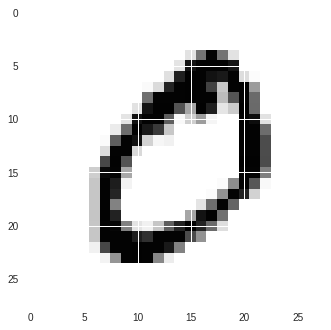

In [ ]:
# il y a 60000 images chaque image est de 28*28 pixels donc 10% c'est 78 pixels a nan
# on fait un algo qui choisit aléatoirement des valeures et les remplace avec un nan
image = Image.fromarray(x_train[1].reshape(28,28))
pyplot.imshow(image)

In [ ]:
import copy
 
x_test_20 = copy.deepcopy(x_test)  #  x_test_20 va contenir x_test moins 20%

x_test_50 = copy.deepcopy(x_test)  #  x_test_50 va contenir x_test moins 50%


x_test_90 = copy.deepcopy(x_test)  #  x_test_90 va contenir x_test moins 90%




In [ ]:
# Eliminer 20% des données test
x_test_20 = x_test_20.reshape(10000*28*28)

idx = np.random.choice(np.arange(len(x_test_20)), int(0.20*len(x_test_20)),  replace = False) # Eliminer 20% des données test
x_test_20[idx] = np.nan
x_test_20 = x_test_20.reshape(10000,28*28)

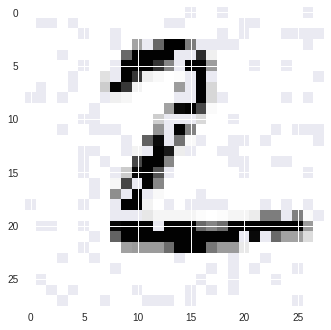

In [ ]:
image1 = Image.fromarray(x_test_20[1].reshape(28,28))
pyplot.imshow(image1)

In [ ]:
# Eliminer 50% des données test
x_test_50 = x_test_50.reshape(10000*28*28)

idx = np.random.choice(np.arange(len(x_test_50)), int(0.50*len(x_test_50)),  replace = False) 
x_test_50[idx] = np.nan
x_test_50 = x_test_50.reshape(10000,28*28)

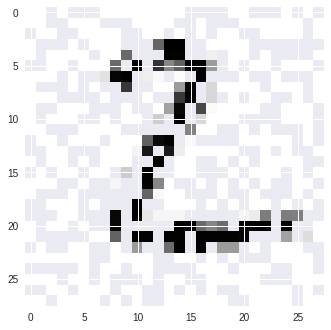

In [ ]:
image1 = Image.fromarray(x_test_50[1].reshape(28,28))
pyplot.imshow(image1)

In [ ]:
# Eliminer 90% des données test
x_test_90 = x_test_90.reshape(10000*28*28)

idx = np.random.choice(np.arange(len(x_test_90)), int(0.90*len(x_test_90)),  replace = False)
x_test_90[idx] = np.nan
x_test_90 = x_test_90.reshape(10000,28*28)

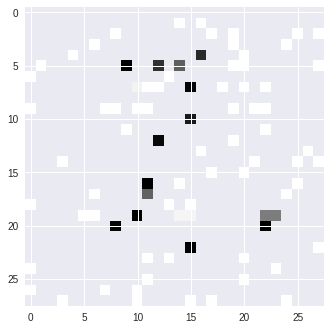

In [ ]:
image1 = Image.fromarray(x_test_90[1].reshape(28,28))
pyplot.imshow(image1)

In [ ]:
import copy
x_test20_zero = copy.deepcopy(x_test_20)
x_test20_mean = copy.deepcopy(x_test_20)
x_test50_zero = copy.deepcopy(x_test_50)
x_test50_mean = copy.deepcopy(x_test_50)
x_test90_zero = copy.deepcopy(x_test_90)
x_test90_mean = copy.deepcopy(x_test_90)



In [ ]:
#Imputation avec la moyenne 
x_test20_mean = x_test20_mean.reshape(10000,28*28)
from sklearn.impute import SimpleImputer
#for img in range(len(x_train_mean)) :
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
tmp =imp_mean.fit_transform(x_test20_mean)
x_test20_mean = tmp

In [ ]:
#Imputation avec la moyenne 
x_test50_mean = x_test50_mean.reshape(10000,28*28)
from sklearn.impute import SimpleImputer
#for img in range(len(x_train_mean)) :
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
tmp =imp_mean.fit_transform(x_test50_mean)
x_test50_mean = tmp

In [ ]:
#Imputation avec la moyenne 
x_test90_mean = x_test90_mean.reshape(10000,28*28)
from sklearn.impute import SimpleImputer
#for img in range(len(x_train_mean)) :
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
tmp =imp_mean.fit_transform(x_test90_mean)
x_test90_mean = tmp

In [ ]:
#Imputation avec zér
x_test20_zero = x_test20_zero.reshape(10000,28*28)
from sklearn.impute import SimpleImputer
imp_zeros = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = 0)
tmp =imp_zeros.fit_transform(x_test20_zero)
x_test20_zero = tmp

In [ ]:
#Imputation avec zér
x_test50_zero = x_test50_zero.reshape(10000,28*28)
from sklearn.impute import SimpleImputer
imp_zeros = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = 0)
tmp =imp_zeros.fit_transform(x_test50_zero)
x_test50_zero = tmp

In [ ]:
#Imputation avec zér
x_test90_zero = x_test90_zero.reshape(10000,28*28)
from sklearn.impute import SimpleImputer
imp_zeros = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = 0)
tmp =imp_zeros.fit_transform(x_test90_zero)
x_test90_zero = tmp

In [ ]:
import copy
x_train_10 = copy.deepcopy(x_train)  # x_train_10 va contenir x_train moins 10%
 
x_train_20 = copy.deepcopy(x_train)  #  x_train_20 va contenir x_train moins 20%
x_train_30 = copy.deepcopy(x_train)  #  x_train_30 va contenir x_train moins 30%
x_train_40 = copy.deepcopy(x_train)  #  x_train_40 va contenir x_train moins 40%
x_train_50 = copy.deepcopy(x_train)  #  x_train_50 va contenir x_train moins 50%
x_train_60 = copy.deepcopy(x_train)  #  x_train_60 va contenir x_train moins 60%
x_train_70 = copy.deepcopy(x_train)  #  x_train_70 va contenir x_train moins 70%
x_train_80 = copy.deepcopy(x_train)  #  x_train_80 va contenir x_train moins 80%
x_train_90 = copy.deepcopy(x_train)  #  x_train_90 va contenir x_train moins 90%
x_train_95 = copy.deepcopy(x_train)  #  x_train_95 va contenir x_train moins 95%





In [ ]:
# maintenant choix aléatoire et remplacement par nan pour chaque image 10% deviennet des nan
#import random
#indice =0
#for img in x_train_10:
 #   for i in range(78): # 78 représente 10% de 784
  #      indice = random.randint(0,783) # tableau commence par l'indice 0
   #     if img[indice] != np.nan:
          
    #      img[indice] = np.nan

x_train_10 = x_train_10.reshape(60000*28*28)

idx = np.random.choice(np.arange(len(x_train_10)), int(0.10*len(x_train_10)),  replace = False) # Eliminer 10% des données train
x_train_10[idx] = np.nan
x_train_10 = x_train_10.reshape(60000,28*28)

In [ ]:
x_train_10[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  nan,   0.,
         0.,   0.,  nan,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        nan,   0.,   0.,   0.,  nan,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,  nan,   0.,   0.,   0.,  nan,   0.,   0.,   0.,   0.,
         0.,  nan,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  nan,
         0.,  nan,  nan,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  nan,   0.,   0.,   0.,   0.,  nan,   0.,   0.,
         0.,  nan,   0.,   0.,   0.,   0.,  nan, 159., 253., 159.,  50.,
         0.,  nan,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  nan,   0.,   0.,   0.,   

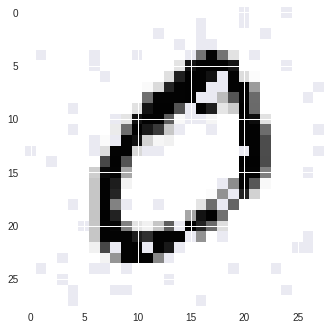

In [ ]:
image1 = Image.fromarray(x_train_10[1].reshape(28,28))
pyplot.imshow(image1)

In [ ]:
# maintenant choix aléatoire et remplacement par nan pour chaque image 20% deviennet des nan
# 157 représente 20% de 784

x_train_20 = x_train_20.reshape(60000*28*28)

idx = np.random.choice(np.arange(len(x_train_20)), int(0.2*len(x_train_20)),  replace = False) # Eliminer 10% des données train
x_train_20[idx] = np.nan
x_train_20 = x_train_20.reshape(60000,28*28)


In [ ]:
x_train_20[1]

array([  0.,   0.,  nan,   0.,   0.,   0.,   0.,  nan,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  nan,   0.,   0.,   0.,  nan,
         0.,  nan,   0.,   0.,   0.,   0.,   0.,  nan,   0.,   0.,  nan,
         0.,   0.,   0.,  nan,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,  nan,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,  nan,   0.,  nan,   0.,  nan,   0.,   0.,   0.,  nan,   0.,
        nan,   0.,  nan,   0.,   0.,   0.,   0.,   0.,  nan,   0.,   0.,
         0.,   0.,  nan,   0.,   0.,   0.,   0.,  nan,   0.,   0.,  nan,
         0.,  nan,   0.,  nan,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        nan,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  nan,  nan,
         0.,   0.,  nan,   0.,   0.,  nan,   0.,   0.,   0.,   0.,   0.,
         0.,  nan,  nan,   0.,   0.,   0.,  nan,  nan,  nan, 159.,  50.,
         0.,   0.,   0.,   0.,   0.,  nan,   0.,  nan,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

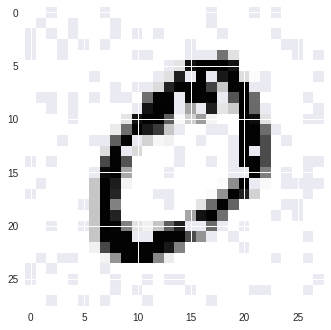

In [ ]:
image2 = Image.fromarray(x_train_20[1].reshape(28,28))
pyplot.imshow(image2)

In [ ]:
# Eliminer 30% de x_train
x_train_30 = x_train_30.reshape(60000*28*28)

idx = np.random.choice(np.arange(len(x_train_30)), int(0.3*len(x_train_30)),  replace = False) # Eliminer 10% des données train
x_train_30[idx] = np.nan
x_train_30 = x_train_30.reshape(60000,28*28)

In [ ]:
x_train_30[1]

array([ nan,  nan,   0.,  nan,   0.,   0.,  nan,   0.,   0.,   0.,  nan,
         0.,   0.,   0.,  nan,  nan,  nan,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,  nan,   0.,   0.,   0.,  nan,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  nan,  nan,  nan,   0.,  nan,   0.,  nan,   0.,
         0.,  nan,  nan,  nan,   0.,   0.,  nan,   0.,   0.,   0.,   0.,
        nan,   0.,   0.,   0.,  nan,   0.,  nan,  nan,   0.,   0.,   0.,
         0.,   0.,  nan,   0.,   0.,  nan,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,  nan,   0.,  nan,   0.,   0.,   0.,   0.,   0.,  nan,
         0.,   0.,   0.,   0.,  nan,  nan,   0.,  nan,   0.,   0.,   0.,
         0.,  nan,  nan,   0.,   0.,  nan,   0.,  nan,  nan,   0.,  nan,
         0.,   0.,   0.,   0.,   0.,   0.,  nan,   0.,   0.,   0.,  nan,
        nan,  nan,  nan,   0.,   0.,   0.,  51.,  nan, 253.,  nan,  nan,
         0.,   0.,   0.,  nan,   0.,   0.,  nan,   0.,  nan,   0.,   0.,
        nan,   0.,   0.,   0.,   0.,  nan,   0.,   

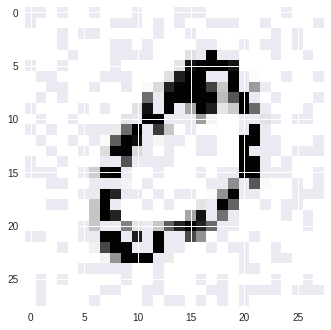

In [ ]:
image3 = Image.fromarray(x_train_30[1].reshape(28,28))
pyplot.imshow(image3)

In [ ]:
# Eliminer 40% de x_train
x_train_40 = x_train_40.reshape(60000*28*28)

idx = np.random.choice(np.arange(len(x_train_40)), int(0.4*len(x_train_40)),  replace = False) # Eliminer 10% des données train
x_train_40[idx] = np.nan
x_train_40 = x_train_40.reshape(60000,28*28)

In [ ]:
x_train_40[1]

array([ nan,  nan,   0.,   0.,   0.,   0.,  nan,   0.,  nan,  nan,  nan,
        nan,   0.,  nan,  nan,   0.,   0.,   0.,   0.,  nan,  nan,   0.,
         0.,   0.,   0.,  nan,   0.,   0.,   0.,  nan,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  nan,   0.,   0.,  nan,  nan,  nan,   0.,
         0.,   0.,   0.,  nan,   0.,   0.,   0.,   0.,  nan,  nan,   0.,
         0.,   0.,   0.,  nan,   0.,   0.,  nan,  nan,   0.,  nan,   0.,
         0.,   0.,   0.,   0.,  nan,  nan,   0.,  nan,  nan,   0.,   0.,
         0.,   0.,  nan,   0.,  nan,   0.,  nan,   0.,   0.,  nan,   0.,
        nan,  nan,  nan,   0.,  nan,   0.,   0.,   0.,   0.,   0.,   0.,
        nan,  nan,   0.,   0.,  nan,   0.,   0.,  nan,  nan,   0.,  nan,
         0.,   0.,  nan,  nan,   0.,  nan,   0.,  nan,   0.,  nan,   0.,
        nan,  nan,   0.,   0.,   0.,  nan,  nan, 159., 253.,  nan,  50.,
        nan,   0.,  nan,   0.,  nan,  nan,   0.,  nan,  nan,   0.,   0.,
         0.,   0.,  nan,   0.,   0.,   0.,   0.,  n

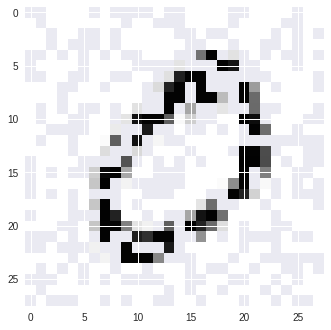

In [ ]:
image = Image.fromarray(x_train_40[1].reshape(28,28))
pyplot.imshow(image)

In [ ]:
# Eliminer 50% de x_train
x_train_50 = x_train_50.reshape(60000*28*28)

idx = np.random.choice(np.arange(len(x_train_50)), int(0.5*len(x_train_50)),  replace = False) # Eliminer 10% des données train
x_train_50[idx] = np.nan
x_train_50 = x_train_50.reshape(60000,28*28)

In [ ]:
x_train_50[1]

array([  0.,   0.,   0.,   0.,  nan,  nan,   0.,  nan,   0.,  nan,  nan,
         0.,  nan,   0.,   0.,  nan,  nan,  nan,  nan,  nan,  nan,   0.,
        nan,   0.,   0.,  nan,   0.,  nan,  nan,   0.,  nan,  nan,  nan,
        nan,  nan,  nan,   0.,  nan,   0.,  nan,  nan,  nan,  nan,   0.,
         0.,   0.,  nan,  nan,   0.,  nan,  nan,  nan,  nan,  nan,   0.,
         0.,   0.,   0.,   0.,   0.,  nan,  nan,  nan,  nan,  nan,  nan,
         0.,   0.,  nan,  nan,   0.,   0.,   0.,   0.,  nan,   0.,   0.,
        nan,   0.,   0.,   0.,  nan,  nan,  nan,  nan,  nan,  nan,   0.,
         0.,   0.,   0.,   0.,   0.,  nan,  nan,   0.,   0.,  nan,  nan,
         0.,   0.,  nan,  nan,  nan,  nan,  nan,   0.,   0.,  nan,  nan,
         0.,  nan,  nan,   0.,  nan,   0.,   0.,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,   0.,  nan,  nan,  nan, 159.,  50.,
        nan,   0.,   0.,   0.,   0.,  nan,   0.,  nan,   0.,   0.,  nan,
         0.,  nan,   0.,   0.,   0.,  nan,  nan,   

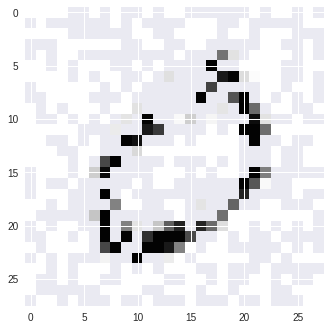

In [ ]:
im = Image.fromarray(x_train_50[1].reshape(28,28))
pyplot.imshow(im)

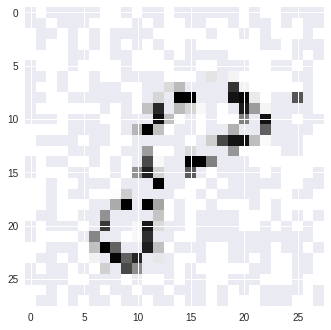

In [ ]:
im = Image.fromarray(x_train_50[59999].reshape(28,28))
pyplot.imshow(im)

In [ ]:
# Eliminer 60% de x_train
x_train_60 = x_train_60.reshape(60000*28*28)

idx = np.random.choice(np.arange(len(x_train_60)), int(0.6*len(x_train_60)),  replace = False) # Eliminer 60% des données train
x_train_60[idx] = np.nan
x_train_60 = x_train_60.reshape(60000,28*28)

In [ ]:
# Eliminer 70% de x_train
x_train_70 = x_train_70.reshape(60000*28*28)

idx = np.random.choice(np.arange(len(x_train_70)), int(0.7*len(x_train_70)),  replace = False) # Eliminer 70% des données train
x_train_70[idx] = np.nan
x_train_70 = x_train_70.reshape(60000,28*28)

In [ ]:
# Eliminer 80% de x_train
x_train_80 = x_train_80.reshape(60000*28*28)

idx = np.random.choice(np.arange(len(x_train_80)), int(0.8*len(x_train_80)),  replace = False) # Eliminer 80% des données train
x_train_80[idx] = np.nan
x_train_80 = x_train_80.reshape(60000,28*28)

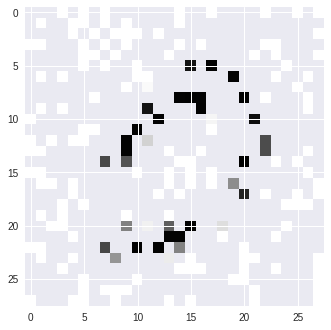

In [ ]:
im = Image.fromarray(x_train_80[1].reshape(28,28))
pyplot.imshow(im)

In [ ]:
# Eliminer 90% de x_train
x_train_90 = x_train_90.reshape(60000*28*28)

idx = np.random.choice(np.arange(len(x_train_90)), int(0.9*len(x_train_90)),  replace = False) # Eliminer 90% des données train
x_train_90[idx] = np.nan
x_train_90 = x_train_90.reshape(60000,28*28)

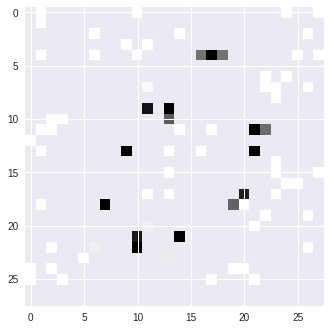

In [ ]:
im = Image.fromarray(x_train_90[1].reshape(28,28))
pyplot.imshow(im)

In [ ]:
# Eliminer 95% de x_train
x_train_95 = x_train_95.reshape(60000*28*28)

idx = np.random.choice(np.arange(len(x_train_95)), int(0.95*len(x_train_95)),  replace = False) # Eliminer 95% des données train
x_train_95[idx] = np.nan
x_train_95 = x_train_95.reshape(60000,28*28)

In [ ]:
# ce que ça donne après avoir appliquer les données manquantes
x_train_95[1]

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,   0.,  nan,  nan,  nan,  nan,  nan,  nan,   0.,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,   0.,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,   0.,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,   0.,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,   0.,  n

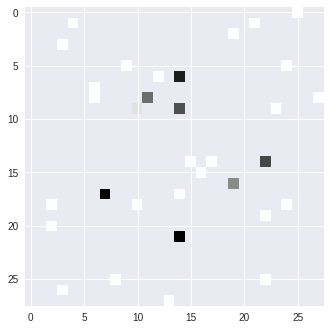

In [ ]:
im = Image.fromarray(x_train_95[1].reshape(28,28))
pyplot.imshow(im)

In [ ]:
x_train[1] # x_train n'a pas subi les modifications de ses copies

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
# j'ai une matrice numpy 
# imputation par des zéros ou moyenne et entrainer le modele
len(x_train)

60000

In [ ]:
# .copy fait une copie de référence si je change la copie l'original change aussi 
import copy
x_train10_mean = copy.deepcopy(x_train_10)
x_train10_zero = copy.deepcopy(x_train_10)
x_train10_knn = copy.deepcopy(x_train_10)

x_train20_mean = copy.deepcopy(x_train_20)
x_train20_zero = copy.deepcopy(x_train_20)
x_train20_knn = copy.deepcopy(x_train_20)


x_train30_mean = copy.deepcopy(x_train_30)
x_train30_zero = copy.deepcopy(x_train_30)
x_train30_knn = copy.deepcopy(x_train_30)


x_train40_mean = copy.deepcopy(x_train_40)
x_train40_zero = copy.deepcopy(x_train_40)
x_train40_knn = copy.deepcopy(x_train_40)


x_train50_mean = copy.deepcopy(x_train_50)
x_train50_zero = copy.deepcopy(x_train_50)
x_train50_knn = copy.deepcopy(x_train_50)


x_train60_mean = copy.deepcopy(x_train_60)
x_train60_zero = copy.deepcopy(x_train_60)
x_train60_knn = copy.deepcopy(x_train_60)


x_train70_mean = copy.deepcopy(x_train_70)
x_train70_zero = copy.deepcopy(x_train_70)
x_train70_knn = copy.deepcopy(x_train_70)


x_train80_mean = copy.deepcopy(x_train_80)
x_train80_zero = copy.deepcopy(x_train_80)
x_train80_knn = copy.deepcopy(x_train_80)


x_train90_mean = copy.deepcopy(x_train_90)
x_train90_zero = copy.deepcopy(x_train_90)
x_train90_knn = copy.deepcopy(x_train_90)


x_train95_mean = copy.deepcopy(x_train_95)
x_train95_zero = copy.deepcopy(x_train_95)
x_train95_knn = copy.deepcopy(x_train_95)


In [ ]:
x_train10_mean[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  nan,   0.,
         0.,   0.,  nan,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        nan,   0.,   0.,   0.,  nan,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,  nan,   0.,   0.,   0.,  nan,   0.,   0.,   0.,   0.,
         0.,  nan,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  nan,
         0.,  nan,  nan,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  nan,   0.,   0.,   0.,   0.,  nan,   0.,   0.,
         0.,  nan,   0.,   0.,   0.,   0.,  nan, 159., 253., 159.,  50.,
         0.,  nan,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  nan,   0.,   0.,   0.,   

In [ ]:
#Imputation avec la moyenne pour x_train_10
x_train10_mean = x_train10_mean.reshape(60000,28*28)
from sklearn.impute import SimpleImputer
#for img in range(len(x_train_mean)) :
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
tmp =imp_mean.fit_transform(x_train10_mean)
x_train10_mean = tmp
#imp_mean.transform(x_train)
  


In [ ]:
x_train_10[1]
# Parfait x_train_10 n'a pas subi les changements de x_train10_mean

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  nan,   0.,
         0.,   0.,  nan,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        nan,   0.,   0.,   0.,  nan,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,  nan,   0.,   0.,   0.,  nan,   0.,   0.,   0.,   0.,
         0.,  nan,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  nan,
         0.,  nan,  nan,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  nan,   0.,   0.,   0.,   0.,  nan,   0.,   0.,
         0.,  nan,   0.,   0.,   0.,   0.,  nan, 159., 253., 159.,  50.,
         0.,  nan,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  nan,   0.,   0.,   0.,   

In [ ]:
x_train10_mean[1]


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.82622895e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.34036458e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

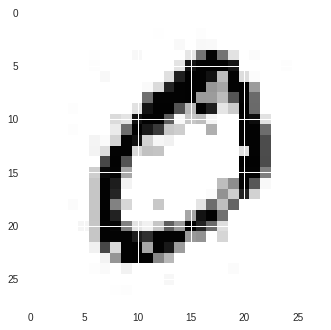

In [ ]:
image = Image.fromarray(x_train10_mean[1].reshape(28,28))
pyplot.imshow(image)

In [ ]:
#Imputation avec zéro de x_train_10
x_train10_zero = x_train10_zero.reshape(60000,28*28)
from sklearn.impute import SimpleImputer
imp_zeros = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = 0)
tmp =imp_zeros.fit_transform(x_train10_zero)
x_train10_zero = tmp


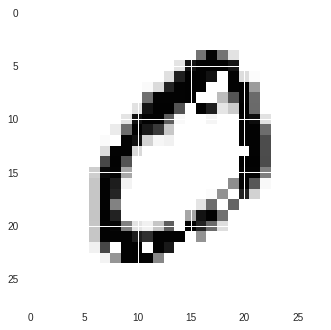

In [ ]:
image = Image.fromarray(x_train10_zero[1].reshape(28,28))
pyplot.imshow(image)

In [ ]:
x_train10_zero[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
#!pip install fancyimpute


In [ ]:
#!pip install ecos

In [ ]:
#!pip uninstall fancyimpute

In [ ]:
#!pip install fancyimpute==0.3.2

In [ ]:
#!pip install rkNN-imputer


In [ ]:
#Imputation avec knn de x_train10
x_train10_knn = x_train10_knn.reshape(60000,28*28)
x_train10_knn = x_train10_knn[:6000]


import fancyimpute
from fancyimpute import KNN    
x_train10_knn = KNN(k=8).fit_transform(x_train10_knn)
#Problème de mémoire

Imputing row 1/6000 with 68 missing, elapsed time: 210.326
Imputing row 101/6000 with 84 missing, elapsed time: 210.626
Imputing row 201/6000 with 88 missing, elapsed time: 210.925
Imputing row 301/6000 with 70 missing, elapsed time: 211.228
Imputing row 401/6000 with 85 missing, elapsed time: 211.524
Imputing row 501/6000 with 77 missing, elapsed time: 211.824
Imputing row 601/6000 with 67 missing, elapsed time: 212.132
Imputing row 701/6000 with 79 missing, elapsed time: 212.429
Imputing row 801/6000 with 80 missing, elapsed time: 212.723
Imputing row 901/6000 with 76 missing, elapsed time: 213.023
Imputing row 1001/6000 with 75 missing, elapsed time: 213.317
Imputing row 1101/6000 with 72 missing, elapsed time: 213.612
Imputing row 1201/6000 with 68 missing, elapsed time: 213.900
Imputing row 1301/6000 with 66 missing, elapsed time: 214.192
Imputing row 1401/6000 with 69 missing, elapsed time: 214.487
Imputing row 1501/6000 with 68 missing, elapsed time: 214.787
Imputing row 1601/60

In [ ]:
#import copy
#x_test_knn = copy.deepcopy(x_test)
#x_test_knn = x_test_knn[:1000]
#y_train_red =  copy.deepcopy(y_train)
#y_train_red = y_train_red[:6000]
#y_test_red = copy.deepcopy(y_test)
#x_test_red = y_test_red[:1000]

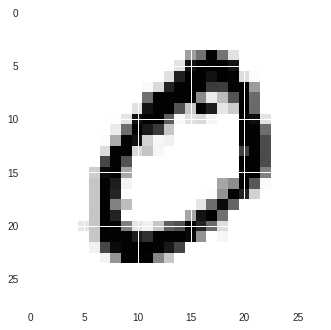

In [ ]:
image = Image.fromarray(x_train10_knn[1].reshape(28,28))
pyplot.imshow(image)

In [ ]:
#import knnimpute
#x_train_knn  = knnimpute(x_train_knn,8)

In [ ]:
#Imputation avec la moyenne pour x_train_20
x_train20_mean = x_train20_mean.reshape(60000,28*28)
from sklearn.impute import SimpleImputer
#for img in range(len(x_train_mean)) :
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
tmp =imp_mean.fit_transform(x_train20_mean)
x_train20_mean = tmp

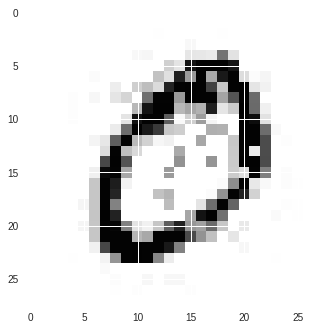

In [ ]:
image = Image.fromarray(x_train20_mean[1].reshape(28,28))
pyplot.imshow(image)

In [ ]:
#Imputation avec zéro de x_train_20
x_train20_zero = x_train20_zero.reshape(60000,28*28)
from sklearn.impute import SimpleImputer
imp_zeros = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = 0)
tmp =imp_zeros.fit_transform(x_train20_zero)
x_train20_zero = tmp

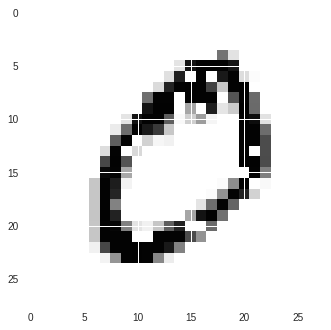

In [ ]:
image = Image.fromarray(x_train20_zero[1].reshape(28,28))
pyplot.imshow(image)

In [ ]:
#Imputation avec knn de x_train20
x_train20_knn = x_train20_knn.reshape(60000,28*28)
x_train20_knn = x_train20_knn[:6000]


import fancyimpute
from fancyimpute import KNN    
x_train20_knn = KNN(k=8).fit_transform(x_train20_knn)

Imputing row 1/6000 with 155 missing, elapsed time: 254.985
Imputing row 101/6000 with 143 missing, elapsed time: 255.707
Imputing row 201/6000 with 171 missing, elapsed time: 256.430
Imputing row 301/6000 with 163 missing, elapsed time: 257.174
Imputing row 401/6000 with 152 missing, elapsed time: 257.905
Imputing row 501/6000 with 168 missing, elapsed time: 258.625
Imputing row 601/6000 with 157 missing, elapsed time: 259.367
Imputing row 701/6000 with 169 missing, elapsed time: 260.114
Imputing row 801/6000 with 178 missing, elapsed time: 260.852
Imputing row 901/6000 with 167 missing, elapsed time: 261.582
Imputing row 1001/6000 with 157 missing, elapsed time: 262.316
Imputing row 1101/6000 with 162 missing, elapsed time: 263.035
Imputing row 1201/6000 with 139 missing, elapsed time: 263.759
Imputing row 1301/6000 with 167 missing, elapsed time: 264.486
Imputing row 1401/6000 with 159 missing, elapsed time: 265.214
Imputing row 1501/6000 with 157 missing, elapsed time: 265.938
Impu

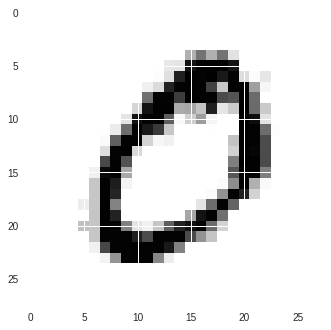

In [ ]:
image = Image.fromarray(x_train20_knn[1].reshape(28,28))
pyplot.imshow(image)

In [ ]:
#Imputation avec la moyenne pour x_train_50
x_train50_mean = x_train50_mean.reshape(60000,28*28)
from sklearn.impute import SimpleImputer
#for img in range(len(x_train_mean)) :
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
tmp =imp_mean.fit_transform(x_train50_mean)
x_train50_mean = tmp

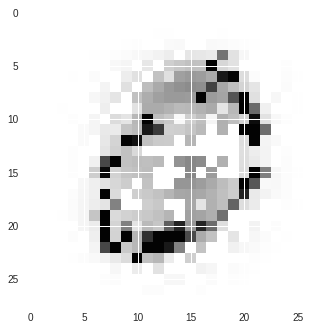

In [ ]:
image = Image.fromarray(x_train50_mean[1].reshape(28,28))
pyplot.imshow(image)

In [ ]:
#Imputation avec zéro de x_train_50
x_train50_zero = x_train50_zero.reshape(60000,28*28)
from sklearn.impute import SimpleImputer
imp_zeros = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = 0)
tmp =imp_zeros.fit_transform(x_train50_zero)
x_train50_zero = tmp

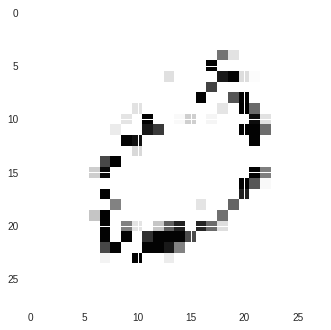

In [ ]:
image = Image.fromarray(x_train50_zero[1].reshape(28,28))
pyplot.imshow(image)

In [ ]:
#Imputation avec knn de x_train50
x_train50_knn = x_train50_knn.reshape(60000,28*28)
x_train50_knn = x_train50_knn[:6000]


import fancyimpute
from fancyimpute import KNN    
x_train50_knn = KNN(k=8).fit_transform(x_train50_knn)

Imputing row 1/6000 with 397 missing, elapsed time: 238.588
Imputing row 101/6000 with 401 missing, elapsed time: 241.106
Imputing row 201/6000 with 391 missing, elapsed time: 243.548
Imputing row 301/6000 with 391 missing, elapsed time: 246.035
Imputing row 401/6000 with 391 missing, elapsed time: 248.486
Imputing row 501/6000 with 356 missing, elapsed time: 250.955
Imputing row 601/6000 with 416 missing, elapsed time: 253.419
Imputing row 701/6000 with 401 missing, elapsed time: 255.859
Imputing row 801/6000 with 393 missing, elapsed time: 258.317
Imputing row 901/6000 with 381 missing, elapsed time: 260.779
Imputing row 1001/6000 with 372 missing, elapsed time: 263.177
Imputing row 1101/6000 with 408 missing, elapsed time: 265.615
Imputing row 1201/6000 with 416 missing, elapsed time: 268.052
Imputing row 1301/6000 with 395 missing, elapsed time: 270.515
Imputing row 1401/6000 with 370 missing, elapsed time: 272.920
Imputing row 1501/6000 with 381 missing, elapsed time: 275.326
Impu

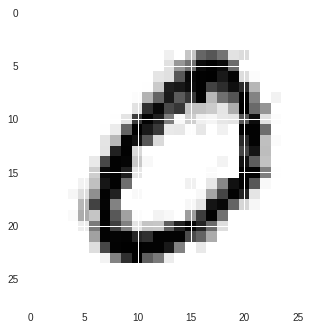

In [ ]:
image = Image.fromarray(x_train50_knn[1].reshape(28,28))
pyplot.imshow(image)

In [ ]:
#Imputation avec la moyenne pour x_train_80
x_train80_mean = x_train80_mean.reshape(60000,28*28)
from sklearn.impute import SimpleImputer
#for img in range(len(x_train_mean)) :
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
tmp =imp_mean.fit_transform(x_train80_mean)
x_train80_mean = tmp

In [ ]:
x_train80_mean[1]


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.36820109e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.68804303e-02, 0.00000000e+00, 1.42400801e-01, 1.11991331e-01,
       1.90448508e-01, 1.58224717e-01, 0.00000000e+00, 1.20984390e-01,
       1.16805524e-01, 2.04352885e-01, 8.83270130e-02, 6.66666701e-02,
       8.79711211e-02, 3.41096781e-02, 0.00000000e+00, 1.26400939e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

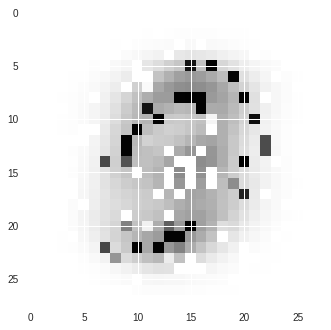

In [ ]:
image = Image.fromarray(x_train80_mean[1].reshape(28,28))
pyplot.imshow(image)

In [ ]:
#Imputation avec zéro de x_train_80
x_train80_zero = x_train80_zero.reshape(60000,28*28)
from sklearn.impute import SimpleImputer
imp_zeros = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = 0)
tmp =imp_zeros.fit_transform(x_train80_zero)
x_train80_zero = tmp

In [ ]:
x_train80_zero[1]


array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

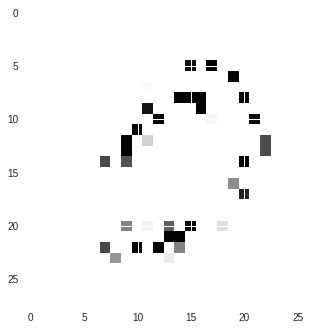

In [ ]:
image = Image.fromarray(x_train80_zero[1].reshape(28,28))
pyplot.imshow(image)

In [ ]:
#Imputation avec knn de x_train80
x_train80_knn = x_train80_knn.reshape(60000,28*28)
x_train80_knn = x_train80_knn[:6000]


import fancyimpute
from fancyimpute import KNN    
x_train80_knn = KNN(k=8).fit_transform(x_train80_knn)

Imputing row 1/6000 with 631 missing, elapsed time: 141.173
Imputing row 101/6000 with 621 missing, elapsed time: 144.154
Imputing row 201/6000 with 635 missing, elapsed time: 147.129
Imputing row 301/6000 with 618 missing, elapsed time: 150.075
Imputing row 401/6000 with 614 missing, elapsed time: 153.014
Imputing row 501/6000 with 623 missing, elapsed time: 155.979
Imputing row 601/6000 with 642 missing, elapsed time: 158.955
Imputing row 701/6000 with 628 missing, elapsed time: 161.946
Imputing row 801/6000 with 628 missing, elapsed time: 164.930
Imputing row 901/6000 with 632 missing, elapsed time: 167.895
Imputing row 1001/6000 with 629 missing, elapsed time: 170.851
Imputing row 1101/6000 with 637 missing, elapsed time: 173.790
Imputing row 1201/6000 with 620 missing, elapsed time: 176.787
Imputing row 1301/6000 with 621 missing, elapsed time: 179.752
Imputing row 1401/6000 with 619 missing, elapsed time: 182.742
Imputing row 1501/6000 with 630 missing, elapsed time: 185.737
Impu

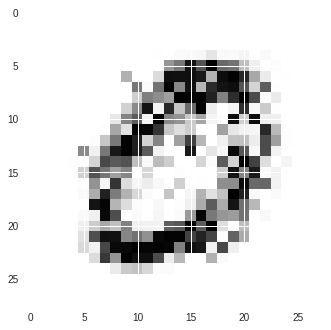

In [ ]:
image = Image.fromarray(x_train80_knn[1].reshape(28,28))
pyplot.imshow(image)

In [ ]:
#Imputation avec la moyenne pour x_train_90
x_train90_mean = x_train90_mean.reshape(60000,28*28)
from sklearn.impute import SimpleImputer
#for img in range(len(x_train_mean)) :
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
tmp =imp_mean.fit_transform(x_train90_mean)
x_train90_mean = tmp

In [ ]:
x_train90_mean[1]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.31679115e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.68476119e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.60548028e-02, 2.65100673e-02, 1.80202618e-01,
       3.03941220e-01, 2.80579120e-01, 1.57938212e-01, 1.28734469e-01,
       2.72940785e-01, 1.76834360e-01, 5.66577017e-02, 4.09590416e-02,
       4.21975851e-02, 0.00000000e+00, 4.33763191e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

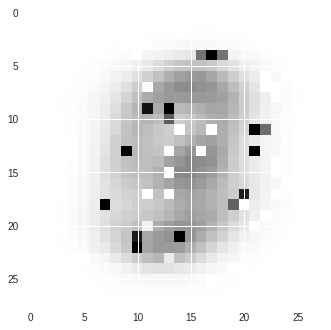

In [ ]:
image = Image.fromarray(x_train90_mean[1].reshape(28,28))
pyplot.imshow(image)

In [ ]:
#Imputation avec zéro de x_train_90
x_train90_zero = x_train90_zero.reshape(60000,28*28)
from sklearn.impute import SimpleImputer
imp_zeros = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = 0)
tmp =imp_zeros.fit_transform(x_train90_zero)
x_train90_zero = tmp

In [ ]:
x_train90_zero[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 159., 253., 159.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

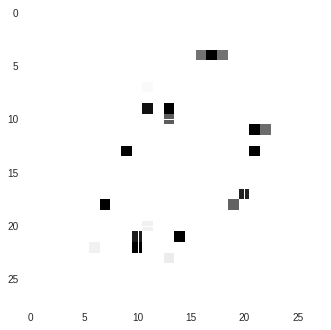

In [ ]:
image = Image.fromarray(x_train90_zero[1].reshape(28,28))
pyplot.imshow(image)

In [ ]:
#Imputation avec knn de x_train90
x_train90_knn = x_train90_knn.reshape(60000,28*28)
x_train90_knn = x_train90_knn[:6000]


import fancyimpute
from fancyimpute import KNN    
x_train90_knn = KNN(k=8).fit_transform(x_train90_knn)

Imputing row 1/6000 with 717 missing, elapsed time: 121.237
Imputing row 101/6000 with 704 missing, elapsed time: 123.918
Imputing row 201/6000 with 702 missing, elapsed time: 126.502
Imputing row 301/6000 with 710 missing, elapsed time: 129.093
Imputing row 401/6000 with 703 missing, elapsed time: 131.697
Imputing row 501/6000 with 718 missing, elapsed time: 134.271
Imputing row 601/6000 with 694 missing, elapsed time: 136.883
Imputing row 701/6000 with 719 missing, elapsed time: 139.496
Imputing row 801/6000 with 708 missing, elapsed time: 142.071
Imputing row 901/6000 with 709 missing, elapsed time: 144.618
Imputing row 1001/6000 with 711 missing, elapsed time: 147.197
Imputing row 1101/6000 with 718 missing, elapsed time: 149.792
Imputing row 1201/6000 with 719 missing, elapsed time: 152.366
Imputing row 1301/6000 with 704 missing, elapsed time: 154.972
Imputing row 1401/6000 with 707 missing, elapsed time: 157.609
Imputing row 1501/6000 with 716 missing, elapsed time: 160.192
Impu

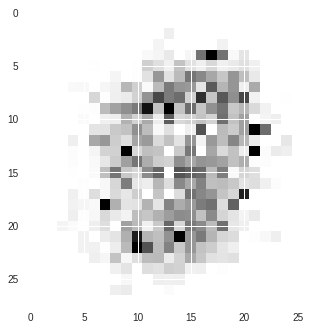

In [ ]:
image = Image.fromarray(x_train90_knn[1].reshape(28,28))
pyplot.imshow(image)

In [ ]:
#Imputation avec la moyenne pour x_train_95
x_train95_mean = x_train95_mean.reshape(60000,28*28)
from sklearn.impute import SimpleImputer
#for img in range(len(x_train_mean)) :
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
tmp =imp_mean.fit_transform(x_train95_mean)
x_train95_mean = tmp

In [ ]:
x_train95_mean[1]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.42771456e-02,
       1.52466372e-01, 0.00000000e+00, 2.18126476e-01, 3.34434897e-01,
       2.50875950e-01, 8.56655315e-02, 1.09278351e-01, 3.54728580e-01,
       2.50672042e-01, 1.33418456e-01, 7.85498470e-02, 1.25746518e-01,
       1.51624545e-01, 0.00000000e+00, 4.77471426e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

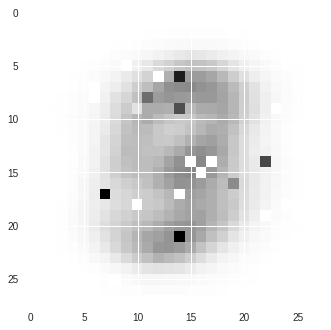

In [ ]:
image = Image.fromarray(x_train95_mean[1].reshape(28,28))
pyplot.imshow(image)

In [ ]:
#Imputation avec zéro de x_train_95
x_train95_zero = x_train95_zero.reshape(60000,28*28)
from sklearn.impute import SimpleImputer
imp_zeros = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = 0)
tmp =imp_zeros.fit_transform(x_train95_zero)
x_train95_zero = tmp

In [ ]:
x_train95_zero[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

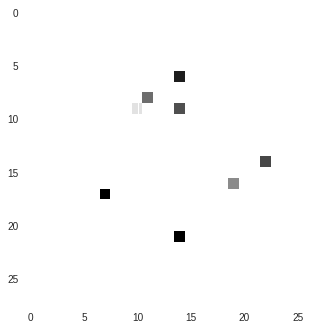

In [ ]:
image = Image.fromarray(x_train95_zero[1].reshape(28,28))
pyplot.imshow(image)

In [ ]:
#Imputation avec knn de x_train95
x_train95_knn = x_train95_knn.reshape(60000,28*28)
x_train95_knn = x_train95_knn[:6000]


import fancyimpute
from fancyimpute import KNN    
x_train95_knn = KNN(k=8).fit_transform(x_train95_knn)

Imputing row 1/6000 with 747 missing, elapsed time: 113.185
Imputing row 101/6000 with 734 missing, elapsed time: 115.148
Imputing row 201/6000 with 748 missing, elapsed time: 117.109
Imputing row 301/6000 with 752 missing, elapsed time: 119.075
Imputing row 401/6000 with 736 missing, elapsed time: 121.046
Imputing row 501/6000 with 743 missing, elapsed time: 122.995
Imputing row 601/6000 with 748 missing, elapsed time: 124.959
Imputing row 701/6000 with 739 missing, elapsed time: 126.941
Imputing row 801/6000 with 743 missing, elapsed time: 128.930
Imputing row 901/6000 with 748 missing, elapsed time: 130.882
Imputing row 1001/6000 with 745 missing, elapsed time: 132.841
Imputing row 1101/6000 with 749 missing, elapsed time: 134.783
Imputing row 1201/6000 with 750 missing, elapsed time: 136.751
Imputing row 1301/6000 with 755 missing, elapsed time: 138.713
Imputing row 1401/6000 with 741 missing, elapsed time: 140.663
Imputing row 1501/6000 with 752 missing, elapsed time: 142.613
Impu

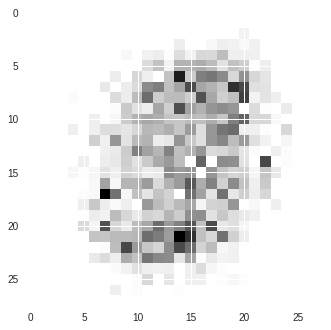

In [ ]:
image = Image.fromarray(x_train95_knn[1].reshape(28,28))
pyplot.imshow(image)

In [ ]:
#Utiliser CNN
img_rows, img_cols = 28, 28
num_category = 10



import keras
from keras.models import Sequential
from keras import optimizers
from keras import regularizers
from keras.layers import Input, BatchNormalization, concatenate, Reshape, Conv2DTranspose, Activation, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras import backend as K

if K.image_data_format() == 'channels_first':
    x_train10_mean = x_train10_mean.reshape(x_train10_mean.shape[0], 1, img_rows, img_cols)
    x_train20_mean = x_train20_mean.reshape(x_train20_mean.shape[0], 1, img_rows, img_cols)
    x_train50_mean = x_train50_mean.reshape(x_train50_mean.shape[0], 1, img_rows, img_cols)
    x_train80_mean = x_train80_mean.reshape(x_train80_mean.shape[0], 1, img_rows, img_cols)
    x_train90_mean = x_train90_mean.reshape(x_train90_mean.shape[0], 1, img_rows, img_cols)
    x_train95_mean = x_train95_mean.reshape(x_train95_mean.shape[0], 1, img_rows, img_cols)
    
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)


    x_train10_zero = x_train10_zero.reshape(x_train10_zero.shape[0], 1, img_rows, img_cols)
    x_train20_zero = x_train20_zero.reshape(x_train20_zero.shape[0], 1, img_rows, img_cols)
    x_train50_zero = x_train50_zero.reshape(x_train50_zero.shape[0], 1, img_rows, img_cols)
    x_train80_zero = x_train80_zero.reshape(x_train80_zero.shape[0], 1, img_rows, img_cols)
    x_train90_zero = x_train90_zero.reshape(x_train90_zero.shape[0], 1, img_rows, img_cols)
    x_train95_zero = x_train95_zero.reshape(x_train95_zero.shape[0], 1, img_rows, img_cols)
    
   # x_train10_knn = x_train10_knn.reshape(x_train10_knn.shape[0], 1, img_rows, img_cols)
    #x_train20_knn = x_train20_knn.reshape(x_train20_knn.shape[0], 1, img_rows, img_cols)
    #x_train50_knn = x_train50_knn.reshape(x_train50_knn.shape[0], 1, img_rows, img_cols)

   # x_train80_knn = x_train80_knn.reshape(x_train80_knn.shape[0], 1, img_rows, img_cols)

    #x_train90_knn = x_train90_knn.reshape(x_train90_knn.shape[0], 1, img_rows, img_cols)
    #x_train95_knn = x_train95_knn.reshape(x_train95_knn.shape[0], 1, img_rows, img_cols)



    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    x_test20_mean = x_test20_mean.reshape(x_test20_mean.shape[0], 1, img_rows, img_cols)
    x_test50_mean = x_test50_mean.reshape(x_test50_mean.shape[0], 1, img_rows, img_cols)
    x_test90_mean = x_test90_mean.reshape(x_test90_mean.shape[0], 1, img_rows, img_cols)

    x_test20_zero = x_test20_zero.reshape(x_test20_zero.shape[0], 1, img_rows, img_cols)
    x_test50_zero = x_test50_zero.reshape(x_test50_zero.shape[0], 1, img_rows, img_cols)
    x_test90_zero = x_test90_zero.reshape(x_test90_zero.shape[0], 1, img_rows, img_cols)


    
    #x_test_knn = x_test_knn.reshape(x_test_knn.shape[0], 1, img_rows, img_cols)

    input_shape = (1, img_rows, img_cols)
else:
    x_train10_mean = x_train10_mean.reshape(x_train10_mean.shape[0], img_rows, img_cols, 1)
    x_train20_mean = x_train20_mean.reshape(x_train20_mean.shape[0], img_rows, img_cols, 1)
    x_train50_mean = x_train50_mean.reshape(x_train50_mean.shape[0], img_rows, img_cols, 1)
    x_train80_mean = x_train80_mean.reshape(x_train80_mean.shape[0], img_rows, img_cols, 1)
    x_train90_mean = x_train90_mean.reshape(x_train90_mean.shape[0], img_rows, img_cols, 1)
    x_train95_mean = x_train95_mean.reshape(x_train95_mean.shape[0], img_rows, img_cols, 1)
    
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)



    x_train10_zero = x_train10_zero.reshape(x_train10_zero.shape[0], img_rows, img_cols, 1)
    x_train20_zero = x_train20_zero.reshape(x_train20_zero.shape[0], img_rows, img_cols, 1)
    x_train50_zero = x_train50_zero.reshape(x_train50_zero.shape[0], img_rows, img_cols, 1)
    x_train80_zero = x_train80_zero.reshape(x_train80_zero.shape[0], img_rows, img_cols, 1)
    x_train90_zero = x_train90_zero.reshape(x_train90_zero.shape[0], img_rows, img_cols, 1)
    x_train95_zero = x_train95_zero.reshape(x_train95_zero.shape[0], img_rows, img_cols, 1)
    
    #x_train10_knn = x_train10_knn.reshape(x_train10_knn.shape[0], img_rows, img_cols, 1)
    #x_train20_knn = x_train20_knn.reshape(x_train20_knn.shape[0], img_rows, img_cols, 1)
    #x_train50_knn = x_train50_knn.reshape(x_train50_knn.shape[0], img_rows, img_cols, 1)
    #x_train80_knn = x_train80_knn.reshape(x_train80_knn.shape[0], img_rows, img_cols, 1)
    #x_train90_knn = x_train90_knn.reshape(x_train90_knn.shape[0], img_rows, img_cols, 1)
    #x_train95_knn = x_train95_knn.reshape(x_train95_knn.shape[0], img_rows, img_cols, 1)

    x_test20_mean =  x_test20_mean.reshape(x_test20_mean.shape[0], img_rows, img_cols, 1)
    x_test20_zero =  x_test20_zero.reshape(x_test20_zero.shape[0], img_rows, img_cols, 1)

    x_test50_mean =  x_test50_mean.reshape(x_test50_mean.shape[0], img_rows, img_cols, 1)
    x_test50_zero =  x_test50_zero.reshape(x_test50_zero.shape[0], img_rows, img_cols, 1)

    x_test90_mean =  x_test90_mean.reshape(x_test90_mean.shape[0], img_rows, img_cols, 1)
    x_test90_zero =  x_test90_zero.reshape(x_test90_zero.shape[0], img_rows, img_cols, 1)


    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    #x_test_knn = x_test_knn.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train/= 255
x_train10_mean /= 255
x_train20_mean  /= 255
x_train50_mean /= 255
x_train80_mean /= 255
x_train90_mean /= 255
x_train95_mean /= 255
x_train10_zero /= 255
x_train20_zero /= 255
x_train50_zero /= 255
x_train80_zero /= 255
x_train90_zero /= 255
x_train95_zero /= 255
x_train10_knn /= 255
x_train20_knn /= 255
x_train50_knn /= 255
x_train80_knn /= 255
x_train90_knn /= 255
x_train95_knn /= 255
x_test /= 255 
x_test20_mean /= 255
x_test50_mean /= 255
x_test90_mean /= 255
x_test20_zero /= 255
x_test50_zero /= 255
x_test90_zero /= 255

#x_test_knn /= 255

    
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)
#y_train_red = keras.utils.to_categorical(y_train_red, num_category)
#y_test_red = keras.utils.to_categorical(y_test_red, num_category)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(num_category, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
#Architecture du modele 
model.summary()

NameError: ignored

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
batch_size = 128
num_epoch = 8
#model training
m_zero95 = model.fit(x_train95_zero, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
m_zero95.history

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 166s 3ms/step - loss: 1.5379 - acc: 0.4679 - val_loss: 0.9386 - val_acc: 0.7768
Epoch 2/8
60000/60000 [==============================] - 165s 3ms/step - loss: 1.3956 - acc: 0.5213 - val_loss: 1.2957 - val_acc: 0.7257
Epoch 3/8
60000/60000 [==============================] - 166s 3ms/step - loss: 1.3469 - acc: 0.5396 - val_loss: 1.6502 - val_acc: 0.5528
Epoch 4/8
60000/60000 [==============================] - 168s 3ms/step - loss: 1.3175 - acc: 0.5506 - val_loss: 1.5721 - val_acc: 0.5719
Epoch 5/8
60000/60000 [==============================] - 167s 3ms/step - loss: 1.2943 - acc: 0.5555 - val_loss: 1.3018 - val_acc: 0.6955
Epoch 6/8
60000/60000 [==============================] - 166s 3ms/step - loss: 1.2696 - acc: 0.5647 - val_loss: 1.0562 - val_acc: 0.7247
Epoch 7/8
60000/60000 [==============================] - 163s 3ms/step - loss: 1

{'acc': [0.46791666666666665,
  0.5213166666666667,
  0.5396000000317891,
  0.5505666666666666,
  0.5555333333651225,
  0.5647166666348775,
  0.57145,
  0.5761333333333334],
 'loss': [1.5379336548487346,
  1.3955566784540812,
  1.3468937809626262,
  1.3174643709182738,
  1.2942622320810955,
  1.269556050936381,
  1.2537088487625123,
  1.2374615894317627],
 'val_acc': [0.7768, 0.7257, 0.5528, 0.5719, 0.6955, 0.7247, 0.7125, 0.7383],
 'val_loss': [0.9386189992904663,
  1.2957290229797362,
  1.6502023708343505,
  1.5721169197082518,
  1.3017906623840332,
  1.0561681484222412,
  0.8751206785202026,
  0.7342570043563843]}

Text(0.5, 1.0, 'Accuracy Curves')

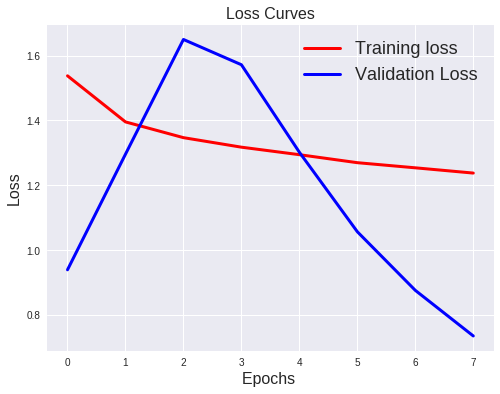

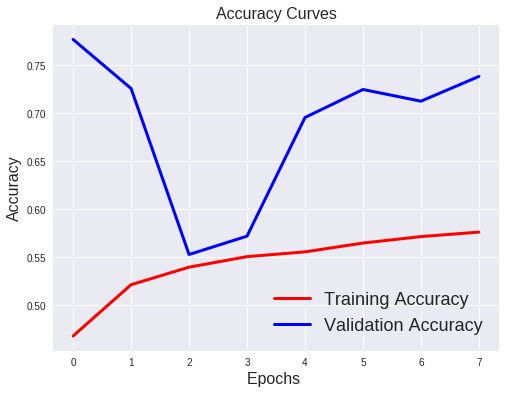

In [ ]:
import matplotlib.pyplot as plt

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(m_zero95.history['loss'],'r',linewidth=3.0)
plt.plot(m_zero95.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(m_zero95.history['acc'],'r',linewidth=3.0)
plt.plot(m_zero95.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
score =model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.7342570085525513
Test accuracy: 0.7383


In [ ]:
batch_size = 128
num_epoch = 8
m_mean95 = model.fit(x_train95_mean, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
m_mean95.history

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 163s 3ms/step - loss: 1.3810 - acc: 0.5251 - val_loss: 0.5391 - val_acc: 0.8330
Epoch 2/8
60000/60000 [==============================] - 162s 3ms/step - loss: 1.2170 - acc: 0.5847 - val_loss: 0.5199 - val_acc: 0.8355
Epoch 3/8
60000/60000 [==============================] - 162s 3ms/step - loss: 1.1698 - acc: 0.6023 - val_loss: 0.4866 - val_acc: 0.8496
Epoch 4/8
60000/60000 [==============================] - 163s 3ms/step - loss: 1.1431 - acc: 0.6095 - val_loss: 0.5839 - val_acc: 0.8116
Epoch 5/8
60000/60000 [==============================] - 163s 3ms/step - loss: 1.1151 - acc: 0.6185 - val_loss: 0.4854 - val_acc: 0.8443
Epoch 6/8
60000/60000 [==============================] - 162s 3ms/step - loss: 1.0983 - acc: 0.6252 - val_loss: 0.4964 - val_acc: 0.8422
Epoch 7/8
60000/60000 [==============================] - 163s 3ms/step - loss: 1.0745 - acc: 0.6338 - val_loss: 0.5006 - val_acc

{'acc': [0.5250999999682109,
  0.58465,
  0.6022833333015442,
  0.6094500000317892,
  0.6185499999682108,
  0.6252333333651224,
  0.6337833333015442,
  0.6366666666984558],
 'loss': [1.381018437131246,
  1.2169932850519816,
  1.1698046309153238,
  1.1431316553751627,
  1.115068337758382,
  1.0982508978525798,
  1.0744798012415568,
  1.0611223093032838],
 'val_acc': [0.833, 0.8355, 0.8496, 0.8116, 0.8443, 0.8422, 0.8397, 0.8306],
 'val_loss': [0.5390709394454956,
  0.5198580448627472,
  0.48657522287368776,
  0.5839190752029418,
  0.48543869495391845,
  0.4963843093395233,
  0.5006285343170166,
  0.5208476778030395]}

Text(0.5, 1.0, '95% de données éliminées, imputation par la moyenne, Accuracy Curves')

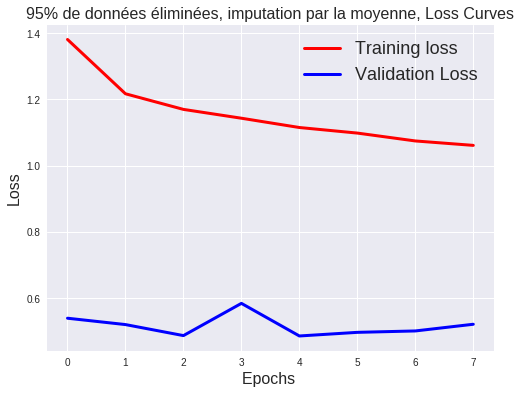

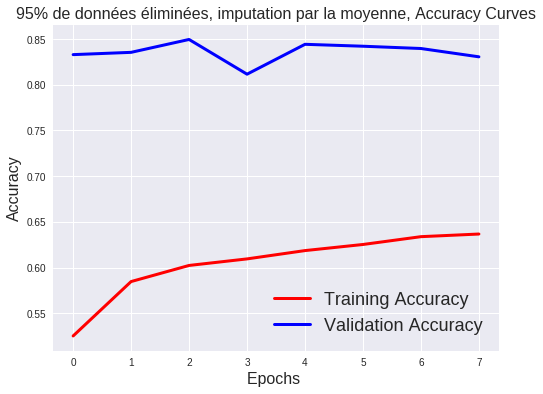

In [ ]:
import matplotlib.pyplot as plt

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(m_mean95.history['loss'],'r',linewidth=3.0)
plt.plot(m_mean95.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('95% de données éliminées, imputation par la moyenne, Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(m_mean95.history['acc'],'r',linewidth=3.0)
plt.plot(m_mean95.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('95% de données éliminées, imputation par la moyenne, Accuracy Curves',fontsize=16)

In [ ]:
batch_size = 128
num_epoch = 8
#model training
m_zero10 = model.fit(x_train10_zero, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
m_zero10.history

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.2258 - acc: 0.9335 - val_loss: 0.0813 - val_acc: 0.9750
Epoch 2/8
60000/60000 [==============================] - 162s 3ms/step - loss: 0.1288 - acc: 0.9629 - val_loss: 0.0560 - val_acc: 0.9818
Epoch 3/8
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0982 - acc: 0.9706 - val_loss: 0.0499 - val_acc: 0.9837
Epoch 4/8
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0829 - acc: 0.9763 - val_loss: 0.0459 - val_acc: 0.9849
Epoch 5/8
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0727 - acc: 0.9784 - val_loss: 0.0386 - val_acc: 0.9876
Epoch 6/8
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0639 - acc: 0.9805 - val_loss: 0.0370 - val_acc: 0.9874
Epoch 7/8
60000/60000 [==============================] - 162s 3ms/step - loss: 0.0581 - acc: 0.9823 - val_loss: 0.0379 - val_acc

{'acc': [0.9335333333333333,
  0.9628833333651224,
  0.9706333333333333,
  0.97635,
  0.9783500000317892,
  0.9804833333651225,
  0.9823166666666666,
  0.9841666666666666],
 'loss': [0.22580001554489135,
  0.1287545729557673,
  0.09823275325695674,
  0.08286955267389616,
  0.07270276327927908,
  0.06390217553873857,
  0.0580772354354461,
  0.053499366935094196],
 'val_acc': [0.975, 0.9818, 0.9837, 0.9849, 0.9876, 0.9874, 0.9869, 0.9885],
 'val_loss': [0.08128948264569044,
  0.05596282688528299,
  0.04991454444676638,
  0.045940582965128124,
  0.03864165780856274,
  0.03703501468293834,
  0.03791149125362281,
  0.03476766277751885]}

Text(0.5, 1.0, '10% de données éliminées, imputation par zéro,Accuracy Curves')

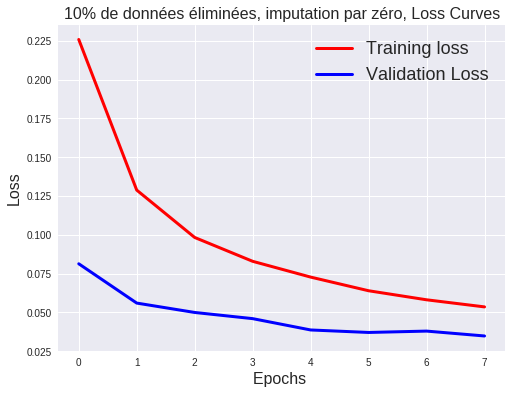

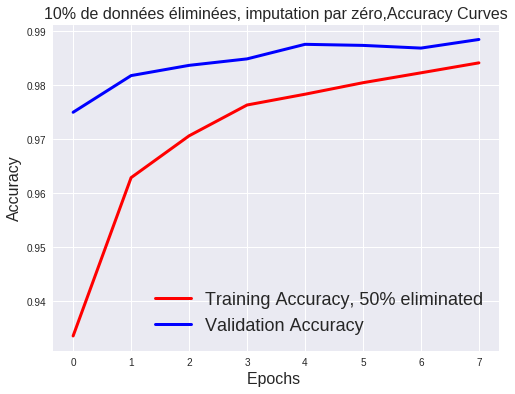

In [ ]:
import matplotlib.pyplot as plt

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(m_zero10.history['loss'],'r',linewidth=3.0)
plt.plot(m_zero10.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('10% de données éliminées, imputation par zéro, Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(m_zero10.history['acc'],'r',linewidth=3.0)
plt.plot(m_zero10.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy, 50% eliminated', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('10% de données éliminées, imputation par zéro,Accuracy Curves',fontsize=16)

In [ ]:
batch_size = 128
num_epoch = 8
#model training
m_mean10 = model.fit(x_train10_mean, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
m_mean10.history

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0649 - acc: 0.9808 - val_loss: 0.0373 - val_acc: 0.9887
Epoch 2/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0557 - acc: 0.9829 - val_loss: 0.0371 - val_acc: 0.9870
Epoch 3/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0508 - acc: 0.9849 - val_loss: 0.0440 - val_acc: 0.9872
Epoch 4/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0489 - acc: 0.9852 - val_loss: 0.0382 - val_acc: 0.9889
Epoch 5/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0452 - acc: 0.9870 - val_loss: 0.0423 - val_acc: 0.9881
Epoch 6/8
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0431 - acc: 0.9872 - val_loss: 0.0395 - val_acc: 0.9889
Epoch 7/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0407 - acc: 0.9880 - val_loss: 0.0413 - val_acc

{'acc': [0.9807833333015442,
  0.9829499999682109,
  0.9848833333015442,
  0.9852333333333333,
  0.9869500000317891,
  0.98725,
  0.9880166666984558,
  0.9889],
 'loss': [0.06489544845422109,
  0.05573518991370996,
  0.05081635417938232,
  0.048948274375995,
  0.04517024963448445,
  0.043116654674212135,
  0.040697045877824224,
  0.0370900479560097],
 'val_acc': [0.9887, 0.987, 0.9872, 0.9889, 0.9881, 0.9889, 0.9882, 0.9893],
 'val_loss': [0.03732807132526505,
  0.03710309831236955,
  0.04396489271438914,
  0.03824001699007203,
  0.04225501134544757,
  0.039507452296606065,
  0.04129837018539838,
  0.04101290287703741]}

Text(0.5, 1.0, '10% de données éliminées, imputation par moyenne, Accuracy Curves')

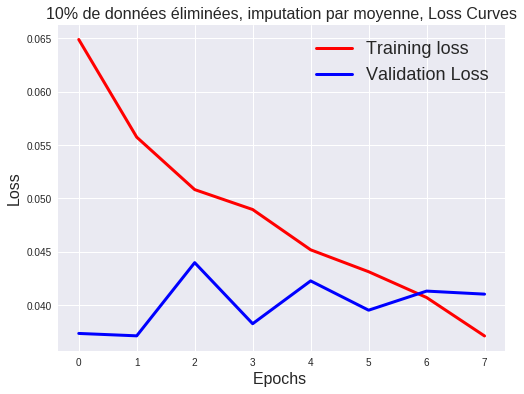

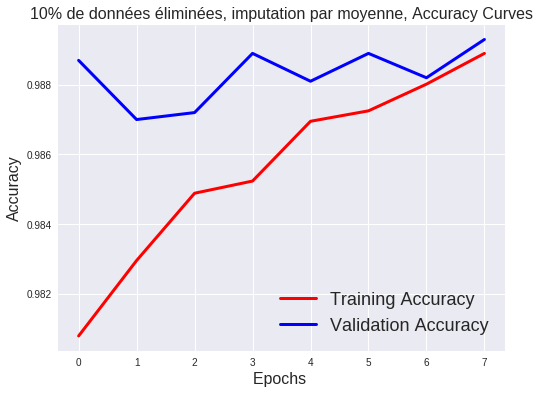

In [ ]:
import matplotlib.pyplot as plt

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(m_mean10.history['loss'],'r',linewidth=3.0)
plt.plot(m_mean10.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('10% de données éliminées, imputation par moyenne, Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(m_mean10.history['acc'],'r',linewidth=3.0)
plt.plot(m_mean10.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('10% de données éliminées, imputation par moyenne, Accuracy Curves',fontsize=16)

In [ ]:
batch_size = 128
num_epoch = 8
#model training
m_zero20 = model.fit(x_train20_zero, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
m_zero20.history

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0767 - acc: 0.9776 - val_loss: 0.0402 - val_acc: 0.9880
Epoch 2/8
60000/60000 [==============================] - 162s 3ms/step - loss: 0.0616 - acc: 0.9814 - val_loss: 0.0393 - val_acc: 0.9880
Epoch 3/8
60000/60000 [==============================] - 162s 3ms/step - loss: 0.0564 - acc: 0.9836 - val_loss: 0.0380 - val_acc: 0.9888
Epoch 4/8
60000/60000 [==============================] - 162s 3ms/step - loss: 0.0523 - acc: 0.9851 - val_loss: 0.0370 - val_acc: 0.9889
Epoch 5/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0499 - acc: 0.9847 - val_loss: 0.0350 - val_acc: 0.9890
Epoch 6/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0477 - acc: 0.9853 - val_loss: 0.0390 - val_acc: 0.9893
Epoch 7/8
60000/60000 [==============================] - 162s 3ms/step - loss: 0.0452 - acc: 0.9862 - val_loss: 0.0339 - val_acc

{'acc': [0.97765,
  0.9813833333333334,
  0.9835500000317892,
  0.9851333333651224,
  0.9846500000317892,
  0.98525,
  0.9862166666348775,
  0.9869333333651225],
 'loss': [0.07674198100765546,
  0.06159195025016864,
  0.05636256405711174,
  0.052287492315967875,
  0.04987822194745143,
  0.04765741696804762,
  0.045163351174443964,
  0.043327495401352646],
 'val_acc': [0.988, 0.988, 0.9888, 0.9889, 0.989, 0.9893, 0.9896, 0.989],
 'val_loss': [0.04016034725062491,
  0.039294662251276896,
  0.03798379375599325,
  0.037003858693075015,
  0.03496654190933332,
  0.03898390763694479,
  0.03388420283063315,
  0.039583326339863924]}

Text(0.5, 1.0, 'Accuracy Curves, imputation with zero')

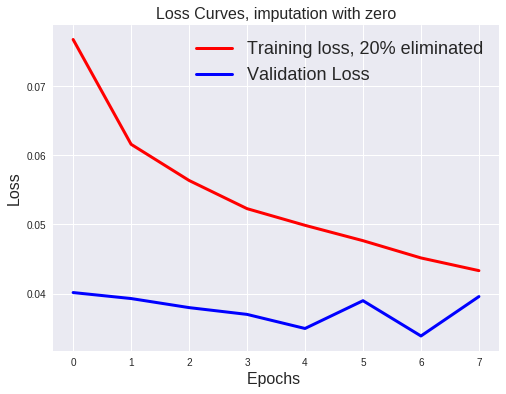

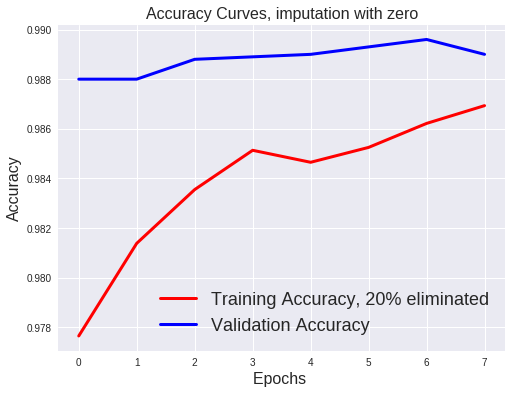

In [ ]:
import matplotlib.pyplot as plt

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(m_zero20.history['loss'],'r',linewidth=3.0)
plt.plot(m_zero20.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss, 20% eliminated', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves, imputation with zero',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(m_zero20.history['acc'],'r',linewidth=3.0)
plt.plot(m_zero20.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy, 20% eliminated', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves, imputation with zero',fontsize=16)

In [ ]:
batch_size = 128
num_epoch = 8
#model training
m_mean20 = model.fit(x_train20_mean, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
m_mean20.history

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0623 - acc: 0.9811 - val_loss: 0.0591 - val_acc: 0.9872
Epoch 2/8
60000/60000 [==============================] - 162s 3ms/step - loss: 0.0502 - acc: 0.9854 - val_loss: 0.0613 - val_acc: 0.9870
Epoch 3/8
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0469 - acc: 0.9862 - val_loss: 0.0586 - val_acc: 0.9872
Epoch 4/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0456 - acc: 0.9865 - val_loss: 0.0596 - val_acc: 0.9873
Epoch 5/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0441 - acc: 0.9868 - val_loss: 0.0573 - val_acc: 0.9880
Epoch 6/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0402 - acc: 0.9874 - val_loss: 0.0684 - val_acc: 0.9867
Epoch 7/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0408 - acc: 0.9879 - val_loss: 0.0632 - val_acc

{'acc': [0.9810666666348775,
  0.9853999999682108,
  0.9861999999682108,
  0.9865166666348775,
  0.9868333333651225,
  0.98735,
  0.9878833333651225,
  0.9890333333333333],
 'loss': [0.062342216101288796,
  0.050172617976864176,
  0.04692958820909262,
  0.04560369686086973,
  0.044126421001553534,
  0.040205163367837665,
  0.04083387606094281,
  0.03803080714692672],
 'val_acc': [0.9872, 0.987, 0.9872, 0.9873, 0.988, 0.9867, 0.9865, 0.9866],
 'val_loss': [0.059127720368250446,
  0.06130014735769801,
  0.05855933603998133,
  0.05957000284414426,
  0.05734248731214029,
  0.06836687240479296,
  0.06322905375171686,
  0.07539144955668525]}

Text(0.5, 1.0, 'Accuracy Curves, imputation with mean')

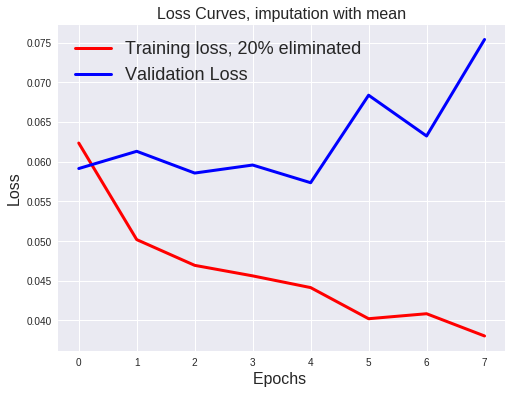

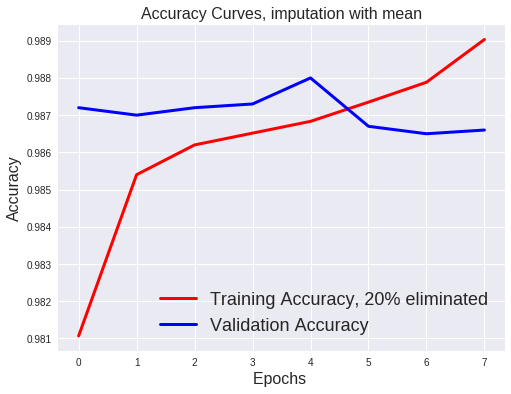

In [ ]:
import matplotlib.pyplot as plt

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(m_mean20.history['loss'],'r',linewidth=3.0)
plt.plot(m_mean20.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss, 20% eliminated', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves, imputation with mean',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(m_mean20.history['acc'],'r',linewidth=3.0)
plt.plot(m_mean20.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy, 20% eliminated', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves, imputation with mean',fontsize=16)

In [ ]:
batch_size = 128
num_epoch = 8
#model training
m_mean50 = model.fit(x_train50_mean, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
m_mean50.history

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 161s 3ms/step - loss: 0.1502 - acc: 0.9559 - val_loss: 0.0935 - val_acc: 0.9851
Epoch 2/8
60000/60000 [==============================] - 162s 3ms/step - loss: 0.1255 - acc: 0.9634 - val_loss: 0.1097 - val_acc: 0.9829
Epoch 3/8
60000/60000 [==============================] - 161s 3ms/step - loss: 0.1125 - acc: 0.9670 - val_loss: 0.1130 - val_acc: 0.9839
Epoch 4/8
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0984 - acc: 0.9707 - val_loss: 0.1161 - val_acc: 0.9839
Epoch 5/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0955 - acc: 0.9721 - val_loss: 0.1425 - val_acc: 0.9813
Epoch 6/8
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0860 - acc: 0.9743 - val_loss: 0.1468 - val_acc: 0.9807
Epoch 7/8
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0821 - acc: 0.9757 - val_loss: 0.1786 - val_acc

{'acc': [0.9559333333015442,
  0.9634499999682109,
  0.9670166666984558,
  0.9707000000317891,
  0.9721499999682108,
  0.9743166666348775,
  0.9756666666666667,
  0.976],
 'loss': [0.15015653644800186,
  0.12550666630268098,
  0.11245287060340245,
  0.09836286728779475,
  0.09554700998067855,
  0.08601816028555234,
  0.08209094161192576,
  0.07961812981367111],
 'val_acc': [0.9851, 0.9829, 0.9839, 0.9839, 0.9813, 0.9807, 0.9773, 0.9802],
 'val_loss': [0.0935060129814221,
  0.1097439434957887,
  0.11303632915424641,
  0.11613026143876214,
  0.14248056473343168,
  0.14675337871484662,
  0.17857401481771448,
  0.16604771784590158]}

Text(0.5, 1.0, 'Accuracy Curves, imputation with mean')

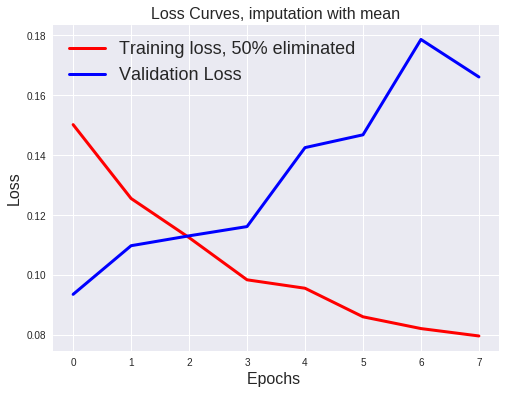

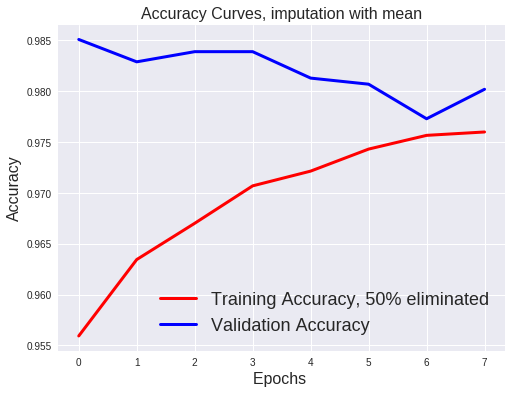

In [ ]:
import matplotlib.pyplot as plt

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(m_mean50.history['loss'],'r',linewidth=3.0)
plt.plot(m_mean50.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss, 50% eliminated', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves, imputation with mean',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(m_mean50.history['acc'],'r',linewidth=3.0)
plt.plot(m_mean50.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy, 50% eliminated', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves, imputation with mean',fontsize=16)

In [ ]:
batch_size = 128
num_epoch = 8
#model training
m_mean50_t = model.fit(x_train50_mean, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_test50_mean, y_test))
m_mean50_t.history

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0739 - acc: 0.9778 - val_loss: 0.0683 - val_acc: 0.9811
Epoch 2/8
60000/60000 [==============================] - 162s 3ms/step - loss: 0.0727 - acc: 0.9779 - val_loss: 0.0778 - val_acc: 0.9793
Epoch 3/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0696 - acc: 0.9788 - val_loss: 0.0754 - val_acc: 0.9804
Epoch 4/8
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0645 - acc: 0.9800 - val_loss: 0.0718 - val_acc: 0.9807
Epoch 5/8
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0624 - acc: 0.9803 - val_loss: 0.0704 - val_acc: 0.9808
Epoch 6/8
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0628 - acc: 0.9814 - val_loss: 0.0746 - val_acc: 0.9781
Epoch 7/8
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0617 - acc: 0.9811 - val_loss: 0.0716 - val_acc

{'acc': [0.9778499999682109,
  0.9779000000317891,
  0.9787999999682109,
  0.9800333333333333,
  0.9803166666984559,
  0.9813833333333334,
  0.9810666666348775,
  0.9824833333333334],
 'loss': [0.07388730510075887,
  0.07266184986531735,
  0.06955280203918617,
  0.06449260197766125,
  0.06236748055120309,
  0.06276655770341555,
  0.061703063341975214,
  0.05830962909758091],
 'val_acc': [0.9811, 0.9793, 0.9804, 0.9807, 0.9808, 0.9781, 0.9808, 0.9803],
 'val_loss': [0.06833009516196326,
  0.07782024521867278,
  0.07535374763541622,
  0.07180822854202998,
  0.07039945043384215,
  0.07464740683158161,
  0.07161734869759967,
  0.07124982291038613]}

Text(0.5, 1.0, 'Accuracy Curves, imputation with mean')

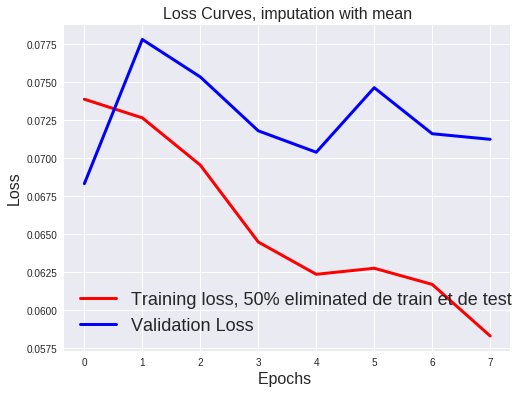

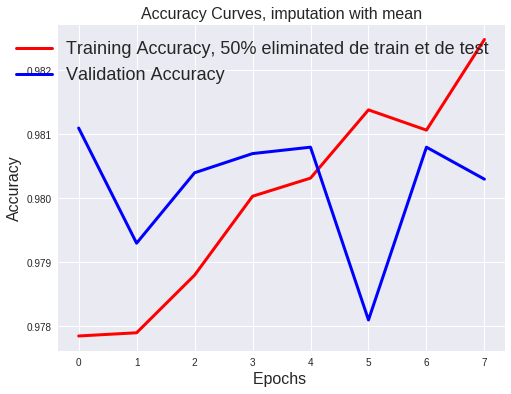

In [ ]:
import matplotlib.pyplot as plt

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(m_mean50_t.history['loss'],'r',linewidth=3.0)
plt.plot(m_mean50_t.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss, 50% eliminated de train et de test', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves, imputation with mean',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(m_mean50_t.history['acc'],'r',linewidth=3.0)
plt.plot(m_mean50_t.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy, 50% eliminated de train et de test', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves, imputation with mean',fontsize=16)

In [ ]:
batch_size = 128
num_epoch = 8
#model training
m_zero50 = model.fit(x_train50_zero, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
m_zero50.history

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 166s 3ms/step - loss: 0.1899 - acc: 0.9527 - val_loss: 0.1060 - val_acc: 0.9809
Epoch 2/8
60000/60000 [==============================] - 166s 3ms/step - loss: 0.1039 - acc: 0.9687 - val_loss: 0.1016 - val_acc: 0.9832
Epoch 3/8
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0920 - acc: 0.9729 - val_loss: 0.0889 - val_acc: 0.9823
Epoch 4/8
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0847 - acc: 0.9747 - val_loss: 0.0913 - val_acc: 0.9840
Epoch 5/8
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0733 - acc: 0.9777 - val_loss: 0.0707 - val_acc: 0.9849
Epoch 6/8
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0740 - acc: 0.9777 - val_loss: 0.0567 - val_acc: 0.9848
Epoch 7/8
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0690 - acc: 0.9786 - val_loss: 0.0777 - val_acc

{'acc': [0.9526833333333333,
  0.9687166666984558,
  0.9728666666984558,
  0.9746666666984558,
  0.9776833333333333,
  0.9777166666348776,
  0.9786333333333334,
  0.9804333333015441],
 'loss': [0.18992465719381968,
  0.10391130120356877,
  0.09199471819798152,
  0.08471126191020012,
  0.07333636482357979,
  0.0739775862554709,
  0.06903011913597584,
  0.06207981291611989],
 'val_acc': [0.9809, 0.9832, 0.9823, 0.984, 0.9849, 0.9848, 0.9856, 0.9844],
 'val_loss': [0.10595804067558129,
  0.10155257626038801,
  0.08889565131006384,
  0.09134061538078185,
  0.07070262145787738,
  0.05669115471948098,
  0.07769463264453562,
  0.07693566034931355]}

Text(0.5, 1.0, 'Accuracy Curves, imputation with zero')

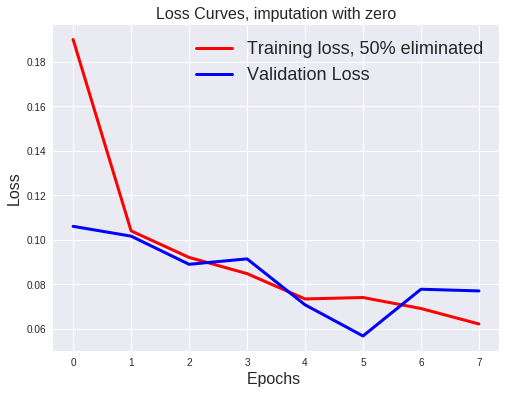

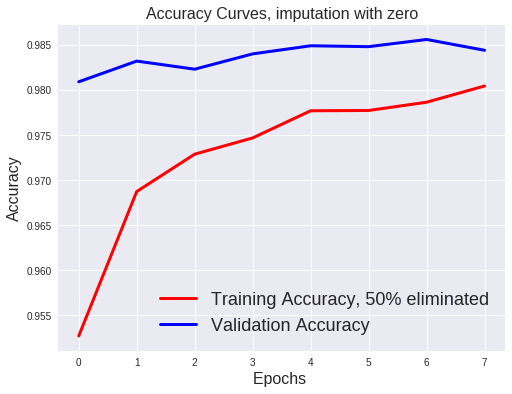

In [ ]:
import matplotlib.pyplot as plt

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(m_zero50.history['loss'],'r',linewidth=3.0)
plt.plot(m_zero50.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss, 50% eliminated', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves, imputation with zero',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(m_zero50.history['acc'],'r',linewidth=3.0)
plt.plot(m_zero50.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy, 50% eliminated', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves, imputation with zero',fontsize=16)

In [ ]:
batch_size = 128
num_epoch = 8
#model training
m_mean90 = model.fit(x_train90_mean, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
m_mean90.history

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 168s 3ms/step - loss: 1.0207 - acc: 0.6694 - val_loss: 0.1208 - val_acc: 0.9776
Epoch 2/8
60000/60000 [==============================] - 164s 3ms/step - loss: 0.7922 - acc: 0.7395 - val_loss: 0.1497 - val_acc: 0.9733
Epoch 3/8
60000/60000 [==============================] - 164s 3ms/step - loss: 0.7283 - acc: 0.7625 - val_loss: 0.1532 - val_acc: 0.9752
Epoch 4/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.6870 - acc: 0.7740 - val_loss: 0.1635 - val_acc: 0.9746
Epoch 5/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.6602 - acc: 0.7829 - val_loss: 0.1613 - val_acc: 0.9752
Epoch 6/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.6345 - acc: 0.7910 - val_loss: 0.1729 - val_acc: 0.9748
Epoch 7/8
60000/60000 [==============================] - 162s 3ms/step - loss: 0.6210 - acc: 0.7966 - val_loss: 0.1867 - val_acc

{'acc': [0.6693666666348775,
  0.7395000000317892,
  0.7625,
  0.774,
  0.7828833333015441,
  0.7910166666984558,
  0.79665,
  0.8003999999682109],
 'loss': [1.0207121180216472,
  0.7921905103047688,
  0.7283472310066224,
  0.6869712763468424,
  0.6602073097864787,
  0.6344579868634542,
  0.6209708181381226,
  0.6007343748728434],
 'val_acc': [0.9776, 0.9733, 0.9752, 0.9746, 0.9752, 0.9748, 0.973, 0.9746],
 'val_loss': [0.12084875766002115,
  0.14974651377076462,
  0.1531773359017449,
  0.16350517185747204,
  0.16133321142530774,
  0.17291025582785383,
  0.18671816693228332,
  0.18854976637735982]}

Text(0.5, 1.0, 'Accuracy Curves, imputation with mean')

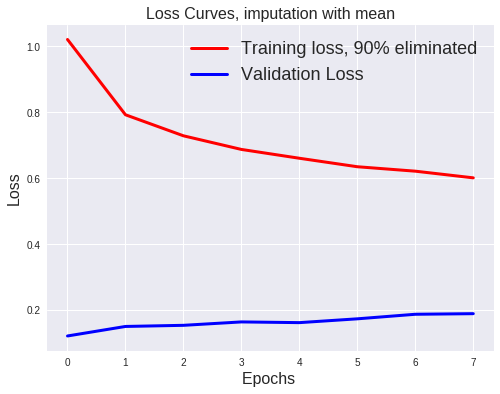

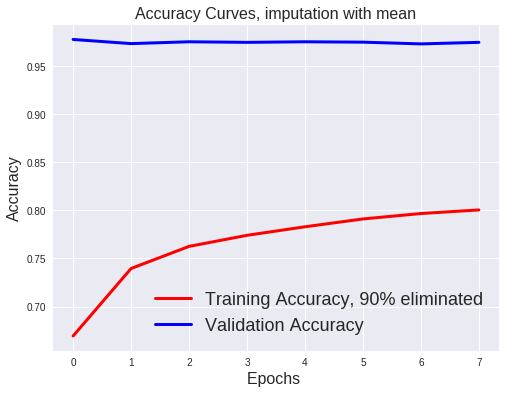

In [ ]:
import matplotlib.pyplot as plt

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(m_mean90.history['loss'],'r',linewidth=3.0)
plt.plot(m_mean90.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss, 90% eliminated', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves, imputation with mean',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(m_mean90.history['acc'],'r',linewidth=3.0)
plt.plot(m_mean90.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy, 90% eliminated', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves, imputation with mean',fontsize=16)

In [ ]:
batch_size = 128
num_epoch = 8
#model training
m_zero90 = model.fit(x_train90_zero, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
m_zero90.history

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 162s 3ms/step - loss: 0.8518 - acc: 0.7189 - val_loss: 0.2399 - val_acc: 0.9629
Epoch 2/8
60000/60000 [==============================] - 161s 3ms/step - loss: 0.7831 - acc: 0.7414 - val_loss: 0.2867 - val_acc: 0.9610
Epoch 3/8
60000/60000 [==============================] - 161s 3ms/step - loss: 0.7544 - acc: 0.7492 - val_loss: 0.2615 - val_acc: 0.9594
Epoch 4/8
60000/60000 [==============================] - 161s 3ms/step - loss: 0.7290 - acc: 0.7587 - val_loss: 0.2567 - val_acc: 0.9603
Epoch 5/8
60000/60000 [==============================] - 161s 3ms/step - loss: 0.7121 - acc: 0.7627 - val_loss: 0.2661 - val_acc: 0.9599
Epoch 6/8
60000/60000 [==============================] - 162s 3ms/step - loss: 0.6948 - acc: 0.7701 - val_loss: 0.3145 - val_acc: 0.9546
Epoch 7/8
60000/60000 [==============================] - 160s 3ms/step - loss: 0.6823 - acc: 0.7724 - val_loss: 0.2771 - val_acc

{'acc': [0.7189499999682109,
  0.7413833333333333,
  0.7492333333015442,
  0.7586666666984558,
  0.7627166666348775,
  0.7700666666348776,
  0.7724166666666666,
  0.7772666666348775],
 'loss': [0.8518077170372009,
  0.7831152363141378,
  0.7544452335675558,
  0.7289543090184529,
  0.7121104210853577,
  0.6948079327583313,
  0.68227361536026,
  0.6710095073064168],
 'val_acc': [0.9629, 0.961, 0.9594, 0.9603, 0.9599, 0.9546, 0.9578, 0.9553],
 'val_loss': [0.23990792797268368,
  0.2867020698850742,
  0.26151185752348977,
  0.25667082667174984,
  0.26606396496905943,
  0.3144989766821265,
  0.277089295042312,
  0.307937413585186]}

Text(0.5, 1.0, 'Accuracy Curves, imputation with zeros')

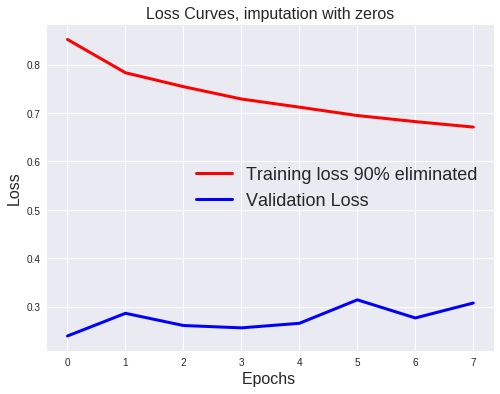

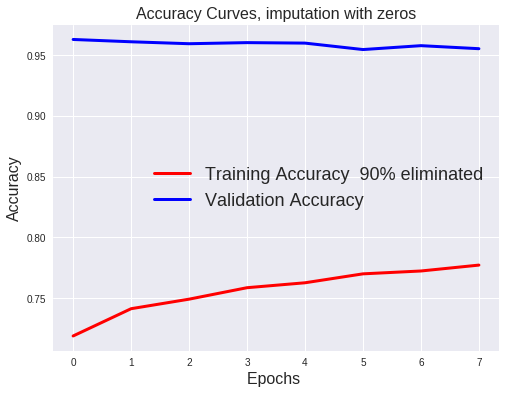

In [ ]:
import matplotlib.pyplot as plt

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(m_zero90.history['loss'],'r',linewidth=3.0)
plt.plot(m_zero90.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss 90% eliminated', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves, imputation with zeros',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(m_zero90.history['acc'],'r',linewidth=3.0)
plt.plot(m_zero90.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy  90% eliminated', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves, imputation with zeros',fontsize=16)

In [ ]:
batch_size = 128
num_epoch = 8
#model training
m_mean80 = model.fit(x_train80_mean, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
m_mean80.history

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 161s 3ms/step - loss: 0.4160 - acc: 0.8746 - val_loss: 0.1780 - val_acc: 0.9725
Epoch 2/8
60000/60000 [==============================] - 162s 3ms/step - loss: 0.3366 - acc: 0.8963 - val_loss: 0.1812 - val_acc: 0.9726
Epoch 3/8
60000/60000 [==============================] - 161s 3ms/step - loss: 0.3130 - acc: 0.9027 - val_loss: 0.1555 - val_acc: 0.9748
Epoch 4/8
60000/60000 [==============================] - 161s 3ms/step - loss: 0.2954 - acc: 0.9077 - val_loss: 0.1585 - val_acc: 0.9755
Epoch 5/8
60000/60000 [==============================] - 161s 3ms/step - loss: 0.2798 - acc: 0.9128 - val_loss: 0.1765 - val_acc: 0.9724
Epoch 6/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.2703 - acc: 0.9156 - val_loss: 0.1922 - val_acc: 0.9739
Epoch 7/8
60000/60000 [==============================] - 162s 3ms/step - loss: 0.2600 - acc: 0.9181 - val_loss: 0.2031 - val_acc

{'acc': [0.8745666666984558,
  0.8963,
  0.90275,
  0.9077333333333333,
  0.9127666666984559,
  0.9156333333015442,
  0.9180500000317892,
  0.9205666666984558],
 'loss': [0.41601655259132386,
  0.33664599674542744,
  0.31299185198148094,
  0.2954480576276779,
  0.2798213618437449,
  0.27028507806857427,
  0.25998544092973075,
  0.2500881812572479],
 'val_acc': [0.9725, 0.9726, 0.9748, 0.9755, 0.9724, 0.9739, 0.9713, 0.9749],
 'val_loss': [0.17800739674324437,
  0.18119780050556,
  0.1554940093456913,
  0.15852577339338822,
  0.17654076504797558,
  0.19220195956515818,
  0.20311790344529654,
  0.14878308959494901]}

Text(0.5, 1.0, 'Accuracy Curves, imputation with mean, 80% éliminés')

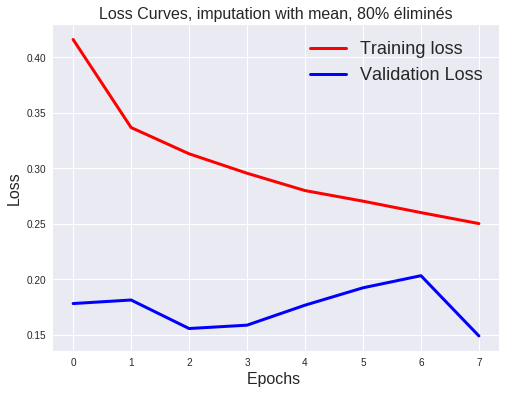

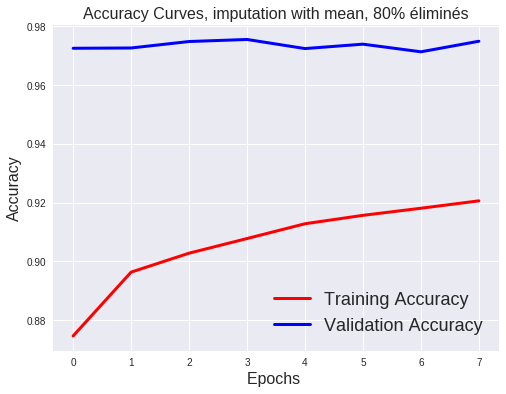

In [ ]:
import matplotlib.pyplot as plt

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(m_mean80.history['loss'],'r',linewidth=3.0)
plt.plot(m_mean80.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves, imputation with mean, 80% éliminés',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(m_mean80.history['acc'],'r',linewidth=3.0)
plt.plot(m_mean80.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves, imputation with mean, 80% éliminés',fontsize=16)

In [ ]:
batch_size = 128
num_epoch = 8
#model training
m_zero80 = model.fit(x_train80_zero, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
m_zero80.history

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 162s 3ms/step - loss: 0.4006 - acc: 0.8756 - val_loss: 0.1627 - val_acc: 0.9749
Epoch 2/8
60000/60000 [==============================] - 162s 3ms/step - loss: 0.3619 - acc: 0.8876 - val_loss: 0.1431 - val_acc: 0.9731
Epoch 3/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.3423 - acc: 0.8916 - val_loss: 0.1595 - val_acc: 0.9733
Epoch 4/8
60000/60000 [==============================] - 165s 3ms/step - loss: 0.3263 - acc: 0.8983 - val_loss: 0.1365 - val_acc: 0.9716
Epoch 5/8
60000/60000 [==============================] - 167s 3ms/step - loss: 0.3147 - acc: 0.8998 - val_loss: 0.1758 - val_acc: 0.9680
Epoch 6/8
60000/60000 [==============================] - 165s 3ms/step - loss: 0.3092 - acc: 0.9031 - val_loss: 0.1881 - val_acc: 0.9687
Epoch 7/8
60000/60000 [==============================] - 164s 3ms/step - loss: 0.2960 - acc: 0.9067 - val_loss: 0.1893 - val_acc

{'acc': [0.8756166666984558,
  0.8876499999682108,
  0.8915666666348775,
  0.8982666666666667,
  0.8997666666984558,
  0.9030666666348776,
  0.9066500000317892,
  0.9082166666666667],
 'loss': [0.4006103823343913,
  0.3618742093404134,
  0.34233168495496114,
  0.32628687976201376,
  0.3147480424324671,
  0.3091840787013372,
  0.295991495291392,
  0.28969928113619486],
 'val_acc': [0.9749, 0.9731, 0.9733, 0.9716, 0.968, 0.9687, 0.9697, 0.9676],
 'val_loss': [0.16272365636959443,
  0.14314060108353152,
  0.1594614683023643,
  0.1365330794133537,
  0.17577212181393334,
  0.18811197345666825,
  0.18932546695335814,
  0.18596918040292112]}

Text(0.5, 1.0, 'Accuracy Curves, imputation with zeros, 80% de données éliminés')

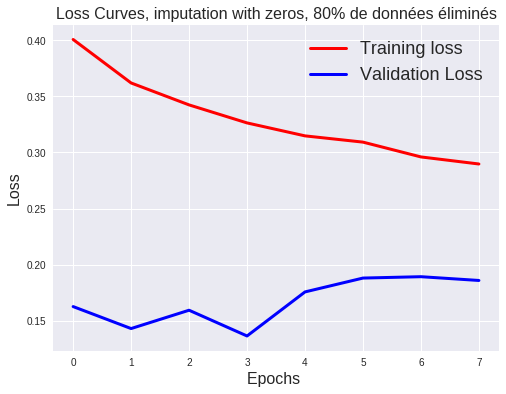

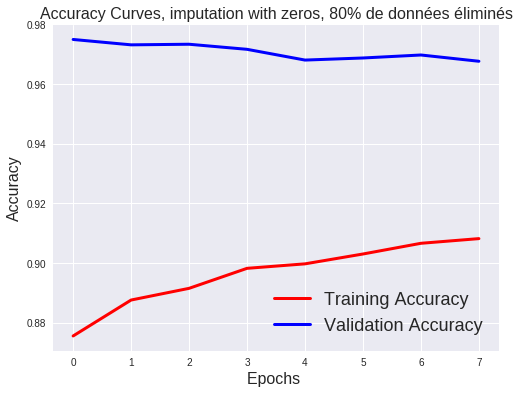

In [ ]:
import matplotlib.pyplot as plt

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(m_zero80.history['loss'],'r',linewidth=3.0)
plt.plot(m_zero80.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss ', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves, imputation with zeros, 80% de données éliminés',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(m_zero80.history['acc'],'r',linewidth=3.0)
plt.plot(m_zero80.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves, imputation with zeros, 80% de données éliminés',fontsize=16)

In [ ]:
batch_size = 128
num_epoch = 8
#model training
m = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
m.history

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 169s 3ms/step - loss: 0.0854 - acc: 0.9764 - val_loss: 0.0423 - val_acc: 0.9869
Epoch 2/8
60000/60000 [==============================] - 169s 3ms/step - loss: 0.0630 - acc: 0.9817 - val_loss: 0.0347 - val_acc: 0.9887
Epoch 3/8
60000/60000 [==============================] - 169s 3ms/step - loss: 0.0585 - acc: 0.9837 - val_loss: 0.0363 - val_acc: 0.9893
Epoch 4/8
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0508 - acc: 0.9859 - val_loss: 0.0372 - val_acc: 0.9894
Epoch 5/8
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0481 - acc: 0.9859 - val_loss: 0.0359 - val_acc: 0.9890
Epoch 6/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0477 - acc: 0.9860 - val_loss: 0.0369 - val_acc: 0.9891
Epoch 7/8
60000/60000 [==============================] - 162s 3ms/step - loss: 0.0435 - acc: 0.9876 - val_loss: 0.0341 - val_acc

{'acc': [0.9763833333333334,
  0.9817333333651225,
  0.9836666666984558,
  0.9858833333651225,
  0.9859499999682109,
  0.9860333333333333,
  0.9876499999682109,
  0.98755],
 'loss': [0.08542878116766611,
  0.06297796116247774,
  0.05848436975777149,
  0.05082214459305008,
  0.04806278035591046,
  0.04769001883318027,
  0.04347686134651303,
  0.04096073331385851],
 'val_acc': [0.9869, 0.9887, 0.9893, 0.9894, 0.989, 0.9891, 0.9898, 0.9894],
 'val_loss': [0.042264408330898735,
  0.03470970786102116,
  0.03633244060601573,
  0.0372351589335216,
  0.03591296547114034,
  0.036886911576474085,
  0.03407648801787946,
  0.03234194560998003]}

Text(0.5, 1.0, 'Accuracy Curves, données dorigine')

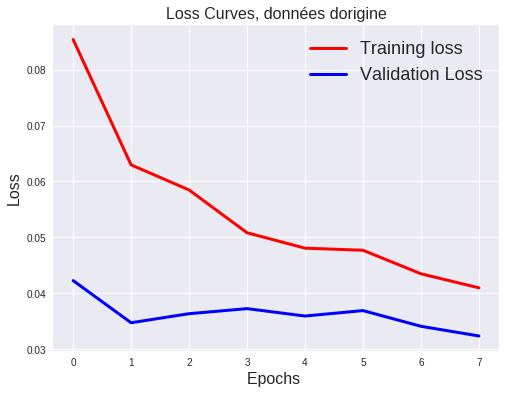

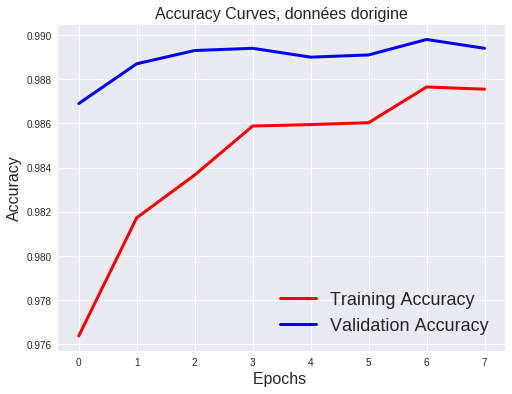

In [ ]:
import matplotlib.pyplot as plt

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(m.history['loss'],'r',linewidth=3.0)
plt.plot(m.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves, données d''origine',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(m.history['acc'],'r',linewidth=3.0)
plt.plot(m.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves, données d''origine',fontsize=16)

In [ ]:
batch_size = 128
num_epoch = 8
#model training
m_t = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_test90_mean, y_test))
m_t.history

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0404 - acc: 0.9882 - val_loss: 7.8753 - val_acc: 0.1194
Epoch 2/8
60000/60000 [==============================] - 162s 3ms/step - loss: 0.0393 - acc: 0.9885 - val_loss: 6.2869 - val_acc: 0.1463
Epoch 3/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0379 - acc: 0.9885 - val_loss: 5.4141 - val_acc: 0.1366
Epoch 4/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0345 - acc: 0.9896 - val_loss: 6.4384 - val_acc: 0.1595
Epoch 5/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0333 - acc: 0.9894 - val_loss: 6.5634 - val_acc: 0.1338
Epoch 6/8
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0343 - acc: 0.9900 - val_loss: 6.6581 - val_acc: 0.1506
Epoch 7/8
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0321 - acc: 0.9905 - val_loss: 8.5988 - val_acc

{'acc': [0.9881666666984558,
  0.9885166666666667,
  0.9885333333651225,
  0.9895833333333334,
  0.9894499999682108,
  0.9900166666348775,
  0.9905499999682108,
  0.9911666666666666],
 'loss': [0.04035295600456496,
  0.03934671998433769,
  0.03793874117036661,
  0.03454732701256871,
  0.03332608583743374,
  0.03429143088708321,
  0.03210593494574229,
  0.031005624450246492],
 'val_acc': [0.1194, 0.1463, 0.1366, 0.1595, 0.1338, 0.1506, 0.1279, 0.127],
 'val_loss': [7.875269027709961,
  6.2868532363891605,
  5.414138763427735,
  6.438410177612305,
  6.56342899093628,
  6.658082333374024,
  8.59880895843506,
  7.070875047302246]}

Text(0.5, 1.0, 'Accuracy Curves, données dorigine et 90% supprimé de test, imputation with mean')

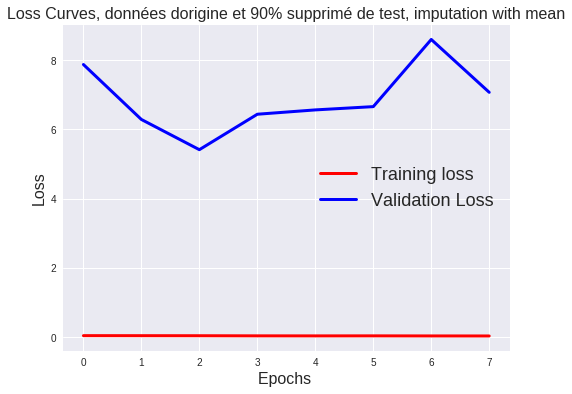

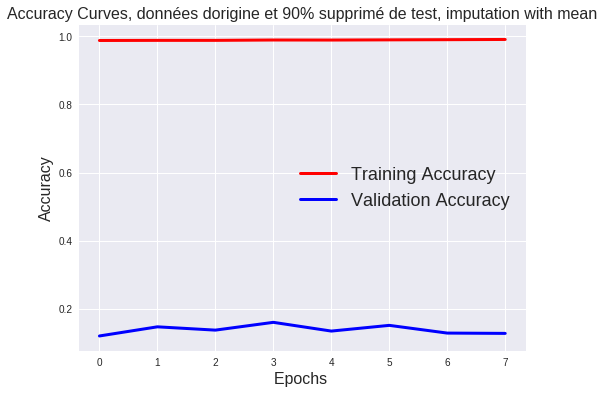

In [ ]:
import matplotlib.pyplot as plt

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(m_t.history['loss'],'r',linewidth=3.0)
plt.plot(m_t.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss ', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves, données d''origine et 90% supprimé de test, imputation with mean',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(m_t.history['acc'],'r',linewidth=3.0)
plt.plot(m_t.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy ', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves, données d''origine et 90% supprimé de test, imputation with mean',fontsize=16)

In [ ]:
batch_size = 128
num_epoch = 8
#model training
m_mean90_t = model.fit(x_train90_mean, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_test90_mean, y_test))
m_mean90_t.history

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 163s 3ms/step - loss: 0.8100 - acc: 0.7541 - val_loss: 0.5859 - val_acc: 0.8197
Epoch 2/8
60000/60000 [==============================] - 162s 3ms/step - loss: 0.6306 - acc: 0.7937 - val_loss: 0.5462 - val_acc: 0.8268
Epoch 3/8
60000/60000 [==============================] - 162s 3ms/step - loss: 0.6010 - acc: 0.8034 - val_loss: 0.5239 - val_acc: 0.8312
Epoch 4/8
60000/60000 [==============================] - 161s 3ms/step - loss: 0.5750 - acc: 0.8109 - val_loss: 0.5397 - val_acc: 0.8338
Epoch 5/8
60000/60000 [==============================] - 161s 3ms/step - loss: 0.5568 - acc: 0.8163 - val_loss: 0.5214 - val_acc: 0.8309
Epoch 6/8
60000/60000 [==============================] - 162s 3ms/step - loss: 0.5459 - acc: 0.8198 - val_loss: 0.4981 - val_acc: 0.8423
Epoch 7/8
60000/60000 [==============================] - 161s 3ms/step - loss: 0.5285 - acc: 0.8268 - val_loss: 0.5003 - val_acc

{'acc': [0.7541166666666667,
  0.7937333333015442,
  0.8034333333651225,
  0.8109000000317892,
  0.8162999999682109,
  0.8198166666666666,
  0.8268166666984558,
  0.8277333333015442],
 'loss': [0.8100044599215189,
  0.630639125919342,
  0.6010440059979757,
  0.574974819691976,
  0.5567667991002401,
  0.5459141149202983,
  0.5284593400637309,
  0.5258852856318156],
 'val_acc': [0.8197, 0.8268, 0.8312, 0.8338, 0.8309, 0.8423, 0.839, 0.842],
 'val_loss': [0.5858676043987274,
  0.5462257571935654,
  0.5238615131378174,
  0.5396873410224915,
  0.5213545495510101,
  0.4980548096179962,
  0.5002974337339401,
  0.5166988153934479]}

Text(0.5, 1.0, 'Accuracy Curves, imputation with mean')

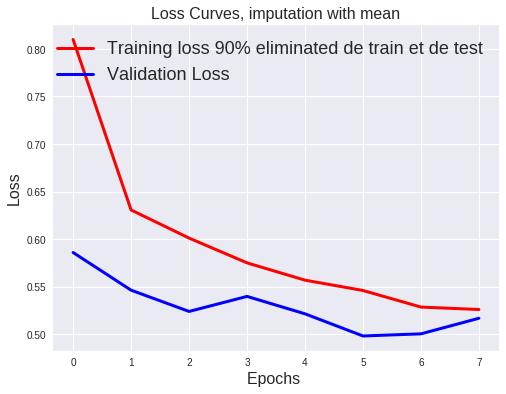

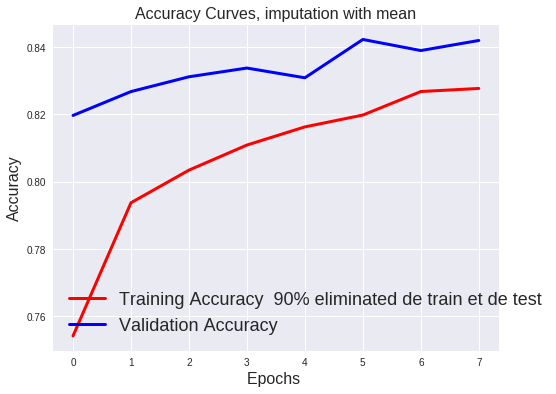

In [ ]:
import matplotlib.pyplot as plt

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(m_mean90_t.history['loss'],'r',linewidth=3.0)
plt.plot(m_mean90_t.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss 90% eliminated de train et de test', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves, imputation with mean',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(m_mean90_t.history['acc'],'r',linewidth=3.0)
plt.plot(m_mean90_t.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy  90% eliminated de train et de test', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves, imputation with mean',fontsize=16)